In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb  
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [927]:
#Reading the Csv and assigning to Datafgrame
df = pd.read_csv("train.csv",encoding='unicode_escape')

In [928]:
#Checking the dataframe shape and composition
print(df.shape)
df.head()

(69999, 172)


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [929]:
# Checking tail
df.tail()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
69994  410.924  329.136         0.00         7.36        10.93          0.00   
69995  289.129  265.772       116.54       196.46       232.63         49.53   
69996  258.374  279.782        77.13        68.44        78.44        335.54   
69997  245.414  145.062        14.01         7.64         6.71         30.34   
69998   42.815  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
69994            0.0           0.00            0.0            0.0   
69995            0.0           0.00            0.0            0.0   
69996            0.0           0.00            0.0            0.0   
69997            0.0           4.58            0.0            0.0   
69998            0.0           0.00            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
69994             60.64             89.66              0.00              0.00   
69995             73.84             47.34              2.01              0.00   
69996             82.58            138.26            142.58            141.26   
69997              6.66              8.84              7.99              1.45   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
69994              0.00               0.0              2.43              0.86   
69995              0.00               0.0              4.01              0.00   
69996            125.58               0.0              4.10              0.00   
69997              2.86               0.0              0.00              0.00   
69998              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
69994          0.00         63.09         96.86              0.00   
69995         46.73        103.96         56.41            109.36   
69996        362.91        268.13        342.29              0.00   
69997         23.33         15.76   

In [930]:
# Checking for Dtype and other info
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [931]:
# A look at the data statistics 
df.describe(include='all')

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [932]:
#Clean Up - 1
##Uniques
df.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [933]:
#Removing columns where the variables are the same for all rows
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
cols_to_drop
# Explantion for dropping columns
#Circle ID: Is a identifier that is same for all rows
#Last_date_of_Month : Same values for all columns , doesn't provide any value for modelling
# Others : All the present values are the same and even if we impute the missing values with mean, all values will become the same and hence will not effect modelling


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [934]:
#New Shape
df.shape

(69999, 159)

In [935]:
# Clean up - 2
## Bad Data##
# There are errors in the data for a few rows : For example Row 2 shows that the customer has re-charged at least once or
# more in the respective month however the recharge amount for that columns is zero. The possibility that the telecom 
# company offers recharge for free is unlikely this can be attributed to bad data collection/ or data error.
#(Argument : Occam's razor )


In [ ]:
#Checking and dropping Badadata for Month 6
Baddata_6 = df[ (df['total_rech_num_6'] > 0) & (df['total_rech_amt_6'] == 0) ].index
df.drop(Baddata_6 , inplace=True)
df.shape

In [ ]:
#Checking and dropping Badadata for Month 7
Baddata_7 = df[ (df['total_rech_num_7'] > 0) & (df['total_rech_amt_7'] == 0) ].index
df.drop(Baddata_7 , inplace=True)
df.shape

In [ ]:
#Checking and dropping Badadata for Month 8
Baddata_8 = df[ (df['total_rech_num_8'] > 0) & (df['total_rech_amt_8'] == 0) ].index
df.drop(Baddata_8 , inplace=True)
df.shape

In [936]:
### We dropped 16250 Rows in all ###

#Impute  - 1 - Numerical Values 

Fill with zero --

By looking at the data, we can conclude that there are columns that has missing values which can be replaced by zero.
These are columns like total_rech_data_6 where a blank values means there was no recharge done hence the recharge value was zero
Also in the dataset, columns count_rech_2g_(6,7,8) have blanks values, but unlike the last example above, they also had zero values mentioned. Looking at the data in a spreadsheet, it can be easily verified that the blank values are also zero and the zero implicitily mentioned is because of the way the data is extracted which is that the data is only shown when either one of the data recharge is available (Point 1- Argument used below for categorical Data  imputation)

In [937]:
Cols_to_fill=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]
df[Cols_to_fill] = df[Cols_to_fill].apply(lambda x: x.fillna(0))

#Did Imputation with zero  cause any bad data in the columns imputed ?


Baddata_6a= df[ (df['total_rech_data_6'] + df['count_rech_2g_6'] + df['count_rech_3g_6'] > 0) & (df['av_rech_amt_data_6'] == 0) ].index
Baddata_7a= df[ (df['total_rech_data_7'] + df['count_rech_2g_7'] + df['count_rech_3g_7'] > 0) & (df['av_rech_amt_data_7'] == 0) ].index
Baddata_8a= df[ (df['total_rech_data_8'] + df['count_rech_2g_8'] + df['count_rech_3g_8'] > 0) & (df['av_rech_amt_data_8'] == 0) ].index
print(Baddata_6a)
print(Baddata_7a)
print(Baddata_8a)

In [938]:
## We did not create bad data ##

#Impute  - 2 - Categorical  Values 

Looking at the data we can also conclude that night_pck_user_(6,7,8) and fb_user_(6,7,8) are categorical values. Null data here most likely suggests a  non subscriber. Please note that there are values of zero present in the data and this is most likely due to Point 1 mentioned above (Point 1 mentioned in the first imputation argument)

Also Note: As zero already exists in data, which denotes non-user/subscrtiber, we will use zero only

In [939]:
#Replacing null values with zero for the above mentioned categorical columns
# 
Cat_Cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
df[Cat_Cols] = df[Cat_Cols].apply(lambda x: x.fillna(0))

In [940]:
#Clean up 
## Null Values
percent_missing=100 * df.isnull().sum()/ len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

column_name  percent_missing
date_of_last_rech_data_6  date_of_last_rech_data_6        74.902499
arpu_3g_6                                arpu_3g_6        74.902499
arpu_2g_6                                arpu_2g_6        74.902499
date_of_last_rech_data_7  date_of_last_rech_data_7        74.478207
arpu_3g_7                                arpu_3g_7        74.478207
arpu_2g_7                                arpu_2g_7        74.478207
arpu_3g_8                                arpu_3g_8        73.689624
date_of_last_rech_data_8  date_of_last_rech_data_8        73.689624
arpu_2g_8                                arpu_2g_8        73.689624
std_ic_t2m_mou_8                  std_ic_t2m_mou_8         5.290076
std_ic_t2f_mou_8                  std_ic_t2f_mou_8         5.290076
std_og_mou_8                          std_og_mou_8         5.290076
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         5.290076
loc_ic_t2m_mou_8                  loc_ic_t2m_mou_8         5.290076
loc_og_mou_8                          loc_og_mou_8         5.290076
std_ic_t2t_mou_8                  std_ic_t2t_mou_8         5.290076
spl_og_mou_8                          spl_og_mou_8         5.290076
std_og_t2t_mou_8                  std_og_t2t_mou_8         5.290076
loc_ic_mou_8                          loc_ic_mou_8         5.290076
std_og_t2f_mou_8                  std_og_t2f_mou_8         5.290076
std_og_t2m_mou_8                  std_og_t2m_mou_8         5.290076
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         5.290076
og_others_8                            og_others_8         5.290076
std_ic_mou_8                          std_ic_mou_8         5.290076
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         5.290076
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         5.290076
loc_ic_t2t_mou_8                  loc_ic_t2t_mou_8         5.290076
roam_og_mou_8                        roam_og_mou_8         5.290076
spl_ic_mou_8                          spl_ic_mou_8         5.290076
roam_ic_mou_8                        roam_ic_mou_8         5.290076
isd_ic_mou_8                          isd_ic_mou_8         5.290076
isd_og_mou_8                          isd_og_mou_8         5.290076
offnet_mou_8                          offnet_mou_8         5.290076
ic_others_8                            ic_others_8         5.290076
onnet_mou_8                            onnet_mou_8         5.290076
loc_ic_t2f_mou_8                  loc_ic_t2f_mou_8         5.290076
loc_ic_t2m_mou_6                  loc_ic_t2m_mou_6         3.954342
loc_ic_t2t_mou_6                  loc_ic_t2t_mou_6         3.954342
std_ic_mou_6                          std_ic_mou_6         3.954342
loc_ic_mou_6                          loc_ic_mou_6         3.954342
std_ic_t2t_mou_6                  std_ic_t2t_mou_6         3.954342
std_ic_t2m_mou_6                  std_ic_t2m_mou_6         3.954342
std_ic_t2f_mou_6                  std_ic_t2f_mou_6         3.954342
spl_ic_mou_6                          spl_ic_mou_6         3.954342
isd_ic_mou_6                          isd_ic_mou_6         3.954342
ic_others_6                            ic_others_6         3.954342
og_others_6                            og_others_6         3.954342
loc_ic_t2f_mou_6                  loc_ic_t2f_mou_6         3.954342
loc_og_t2c_mou_6                  loc_og_t2c_mou_6         3.954342
std_og_t2m_mou_6                  std_og_t2m_mou_6         3.954342
std_og_t2f_mou_6                  std_og_t2f_mou_6         3.954342
loc_og_t2m_mou_6                  loc_og_t2m_mou_6         3.954342
spl_og_mou_6                          spl_og_mou_6         3.954342
std_og_mou_6                          std_og_mou_6         3.954342
roam_og_mou_6                        roam_og_mou_6         3.954342
isd_og_mou_6                          isd_og_mou_6         3.954342
std_og_t2t_mou_6                  std_og_t2t_mou_6         3.954342
roam_ic_mou_6                        roam_ic_mou_6         3.954342
loc_og_t2f_mou_6           

In [941]:
df.shape

(69999, 159)

In [942]:
# Clean up - 3
## Large Missing Data
# Too many missing values with no logical way to fill them- Lets DROP all that have more 60% missing
threshold = round(69999*30/100)
df=df.dropna(thresh=threshold ,axis=1)

In [943]:
#Clean up 
## Null Values
percent_missing=100 * df.isnull().sum()/ len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

column_name  percent_missing
std_ic_t2f_mou_8        std_ic_t2f_mou_8         5.290076
std_ic_t2t_mou_8        std_ic_t2t_mou_8         5.290076
isd_og_mou_8                isd_og_mou_8         5.290076
std_og_t2m_mou_8        std_og_t2m_mou_8         5.290076
spl_og_mou_8                spl_og_mou_8         5.290076
std_og_t2t_mou_8        std_og_t2t_mou_8         5.290076
og_others_8                  og_others_8         5.290076
loc_og_mou_8                loc_og_mou_8         5.290076
loc_ic_t2t_mou_8        loc_ic_t2t_mou_8         5.290076
loc_og_t2c_mou_8        loc_og_t2c_mou_8         5.290076
loc_ic_t2m_mou_8        loc_ic_t2m_mou_8         5.290076
loc_og_t2f_mou_8        loc_og_t2f_mou_8         5.290076
loc_ic_t2f_mou_8        loc_ic_t2f_mou_8         5.290076
loc_og_t2m_mou_8        loc_og_t2m_mou_8         5.290076
std_og_mou_8                std_og_mou_8         5.290076
loc_og_t2t_mou_8        loc_og_t2t_mou_8         5.290076
loc_ic_mou_8                loc_ic_mou_8         5.290076
std_og_t2f_mou_8        std_og_t2f_mou_8         5.290076
std_ic_t2m_mou_8        std_ic_t2m_mou_8         5.290076
ic_others_8                  ic_others_8         5.290076
roam_ic_mou_8              roam_ic_mou_8         5.290076
isd_ic_mou_8                isd_ic_mou_8         5.290076
std_ic_mou_8                std_ic_mou_8         5.290076
offnet_mou_8                offnet_mou_8         5.290076
roam_og_mou_8              roam_og_mou_8         5.290076
spl_ic_mou_8                spl_ic_mou_8         5.290076
onnet_mou_8                  onnet_mou_8         5.290076
og_others_6                  og_others_6         3.954342
isd_og_mou_6                isd_og_mou_6         3.954342
ic_others_6                  ic_others_6         3.954342
spl_og_mou_6                spl_og_mou_6         3.954342
isd_ic_mou_6                isd_ic_mou_6         3.954342
std_ic_t2m_mou_6        std_ic_t2m_mou_6         3.954342
loc_ic_t2t_mou_6        loc_ic_t2t_mou_6         3.954342
loc_ic_t2f_mou_6        loc_ic_t2f_mou_6         3.954342
std_ic_mou_6                std_ic_mou_6         3.954342
loc_ic_mou_6                loc_ic_mou_6         3.954342
std_ic_t2f_mou_6        std_ic_t2f_mou_6         3.954342
std_ic_t2t_mou_6        std_ic_t2t_mou_6         3.954342
spl_ic_mou_6                spl_ic_mou_6         3.954342
loc_ic_t2m_mou_6        loc_ic_t2m_mou_6         3.954342
roam_ic_mou_6              roam_ic_mou_6         3.954342
std_og_t2t_mou_6        std_og_t2t_mou_6         3.954342
loc_og_t2f_mou_6        loc_og_t2f_mou_6         3.954342
loc_og_t2t_mou_6        loc_og_t2t_mou_6         3.954342
loc_og_t2c_mou_6        loc_og_t2c_mou_6         3.954342
roam_og_mou_6              roam_og_mou_6         3.954342
loc_og_mou_6                loc_og_mou_6         3.954342
loc_og_t2m_mou_6        loc_og_t2m_mou_6         3.954342
std_og_mou_6                std_og_mou_6         3.954342
offnet_mou_6                offnet_mou_6         3.954342
std_og_t2m_mou_6        std_og_t2m_mou_6         3.954342
std_og_t2f_mou_6        std_og_t2f_mou_6         3.954342
onnet_mou_6                  onnet_mou_6         3.954342
spl_ic_mou_7                spl_ic_mou_7         3.838626
offnet_mou_7                offnet_mou_7         3.838626
std_ic_mou_7                std_ic_mou_7         3.838626
roam_ic_mou_7              roam_ic_mou_7         3.838626
std_ic_t2f_mou_7        std_ic_t2f_mou_7         3.838626
onnet_mou_7                  onnet_mou_7         3.838626
isd_ic_mou_7                isd_ic_mou_7         3.838626
roam_og_mou_7              roam_og_mou_7         3.838626
std_ic_t2m_mou_7        std_ic_t2m_mou_7         3.838626
loc_og_t2t_mou_7        loc_og_t2t_mou_7         3.838626
ic_others_7                  ic_others_7         3.838626
std_ic_t2t_mou_7        std_ic_t2t_mou_7         3.838626
std_og_mou_7                std_og_mou_7         3.838626
loc_og_t2m_mou_7        loc_og_t2m_mou_7         3.838626
loc_og_mou_7               

In [944]:
df.shape

(69999, 150)

In [945]:
## We dropped 9 Columns##

In [946]:
# Clean up - 4
## - No Meaningful information
# Dropping remaining dates columns as they don't provide any meaningful info nor can they be used for feature engineering, also dropping ID as it is an identifier
cols_to_drop = ['id','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df=df.drop(cols_to_drop, axis=1)


#Impute  - 3 - Using KNN Imputer

We now only have columns that have values missing from 3.08 and below, we can use the KNN imputer to impute these values.

##Important##

----As KNN Imputer is a computationally demanding process, we will sub set the dataframe so that we do this only on the high value customer. Also the columns that we will use to subsets do not have blank values so subsetting before KNN imputer will not affect the number of columns retained if we had imputed first and than subsetted.

In [947]:
### Impute 3 - Step 3 
# Imputation using KNN Imputer
imputer = KNNImputer()
df[:]=  imputer.fit_transform(df)
#df.to_excel('imputed.xlsx')

In [1486]:
#Highvalue customer 
#The VBC Columns - Adding _month number format to maintain consistency  
df=df.rename(columns= {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'})

##Calculating average spend over month 6 and 7
df['Ave_Spend']=(((df.total_rech_data_6 * df.av_rech_amt_data_6)+df.total_rech_amt_6+df.vbc_3g_6)+((df.total_rech_data_7 * df.av_rech_amt_data_7)+df.total_rech_amt_7+df.vbc_3g_7))/2
print('Retaining customers data only if Average Spend is more than or equal to :')
df.Ave_Spend.quantile(0.7)


Retaining customers data only if Average Spend is more than or equal to :


517.588

In [1487]:
### Impute 3 - Step 2
#Subsetting high value Customers and assigning to a new dataframe df_new
df_new=df[df.Ave_Spend >= df.Ave_Spend.quantile(0.7)]
df_new = df_new.reset_index(drop=True)
## Dropping the new columns that we created to subset
df_new=df_new.drop(['Ave_Spend'],axis=1)



In [1488]:
print(df.shape)
print(df_new.shape)

(69999, 147)
(21000, 146)


In [1489]:
df_new.isnull().sum()/ len(df_new)


arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

### Feature Engineering 
#### Important ####
Why 8th month was not used for feature en

Real World VS Assignment 
The data given for Assignment has only three month data (6,7,8) followed by churn probability with the premise that the churn happens in the third month. If that is the case, in real world scenario there will be no data related to the 8th hence any feature engineering done using month 8 data is moot and cannot be applied to real world scenario.

In the original Kaggle competition, there were 4 months in  the data (6,7,8,9), hence 8th month could have been used for feature engineering (_diff columns as shown in the sample code) 

That said, the test.csv has 8th month data and for only for assignment we could use 8th month for feature engineering (example the _diff columns created in the sample code given), however to ensure code is applicable to real world scenario I won't be using the 8 the month for any feature engineering

So instead of creating new feature by substracting average of 7 and 7 of on mou, arpu etc from the respective columns of the 8th month, we will use a average feature 
### Also Important 
Why wasn't the 8th month columns dropped earlier to reduce computational load?
   We might not be using the _8 columns for model building but it was used above to weed out bad data, dropping these columns at the start of clean up would mean that we would have no way to calculate rows with bad data in dataset as the required columns to calculate that would no longer be present

In [1490]:
# As Explained above we won't be using the _8th month column anymore

cols_to_drop = [col for col in df_new.columns if '_8' in col]
df_new.drop(cols_to_drop, axis=1, inplace=True)

In [1491]:
#Feature Engineering
## Calculating change column in the usage/spend pattern from 6th to 7th month

df_new['arpu_average'] = ((df_new.arpu_6 + df_new.arpu_7))/2

df_new['onnet_mou_average'] = ((df_new.onnet_mou_6 + df_new.onnet_mou_7))/2

df_new['offnet_mou_average'] = ((df_new.offnet_mou_6 + df_new.offnet_mou_7))/2

df_new['roam_ic_mou_average'] = ((df_new.roam_ic_mou_6 + df_new.roam_ic_mou_7))/2

df_new['roam_og_mou_average'] =  ((df_new.roam_og_mou_6 + df_new.roam_og_mou_7))/2

df_new['loc_og_t2t_mou_average'] = ((df_new.loc_og_t2t_mou_6 + df_new.loc_og_t2t_mou_7))/2

df_new['loc_og_t2m_mou_average'] = ((df_new.loc_og_t2m_mou_6 + df_new.loc_og_t2m_mou_7))/2

df_new['loc_og_t2f_mou_average'] = ((df_new.loc_og_t2f_mou_6 + df_new.loc_og_t2f_mou_7))/2

df_new['loc_og_t2c_mou_average'] = ((df_new.loc_og_t2c_mou_6 + df_new.loc_og_t2c_mou_7))/2

df_new['loc_og_mou_average'] = ((df_new.loc_og_mou_6 + df_new.loc_og_mou_7))/2

df_new['std_og_t2t_mou_average'] = ((df_new.std_og_t2t_mou_6 + df_new.std_og_t2t_mou_7))/2

df_new['std_og_t2m_mou_average'] = ((df_new.std_og_t2m_mou_6 + df_new.std_og_t2m_mou_7))/2

df_new['std_og_t2f_mou_average'] = ((df_new.std_og_t2f_mou_6 + df_new.std_og_t2f_mou_7))/2

df_new['std_og_mou_average'] = ((df_new.std_og_mou_6 + df_new.std_og_mou_7))/2

df_new['isd_og_mou_average'] = ((df_new.isd_og_mou_6 + df_new.isd_og_mou_7))/2

df_new['spl_og_mou_average'] = ((df_new.spl_og_mou_6 + df_new.spl_og_mou_7))/2

df_new['og_others_average'] = ((df_new.og_others_6 + df_new.og_others_7))/2

df_new['total_og_mou_average'] = ((df_new.total_og_mou_6 + df_new.total_og_mou_7))/2

df_new['loc_ic_t2t_mou_average'] = ((df_new.loc_ic_t2t_mou_6 + df_new.loc_ic_t2t_mou_7))/2

df_new['loc_ic_t2m_mou_average'] = ((df_new.loc_ic_t2m_mou_6 + df_new.loc_ic_t2m_mou_7))/2

df_new['loc_ic_t2f_mou_average'] = ((df_new.loc_ic_t2f_mou_6 + df_new.loc_ic_t2f_mou_7))/2

df_new['loc_ic_mou_average'] = ((df_new.loc_ic_mou_6 + df_new.loc_ic_mou_7))/2   

df_new['std_ic_t2t_mou_average'] = ((df_new.std_ic_t2t_mou_6 + df_new.std_ic_t2t_mou_7))/2

df_new['std_ic_t2m_mou_average'] = ((df_new.std_ic_t2m_mou_6 + df_new.std_ic_t2m_mou_7))/2

df_new['std_ic_t2f_mou_average'] = ((df_new.std_ic_t2f_mou_6 + df_new.std_ic_t2f_mou_7))/2 

df_new['std_ic_mou_average'] = ((df_new.std_ic_mou_6 + df_new.std_ic_mou_7))/2

df_new['total_ic_mou_average'] = ((df_new.total_ic_mou_6 + df_new.total_ic_mou_7))/2

df_new['spl_ic_mou_average'] =((df_new.spl_ic_mou_6 + df_new.spl_ic_mou_7))/2

df_new['isd_ic_mou_average'] =((df_new.isd_ic_mou_6 + df_new.isd_ic_mou_7))/2

df_new['ic_others_average'] =((df_new.ic_others_6 + df_new.ic_others_7))/2

df_new['total_rech_num_average'] =((df_new.total_rech_num_6 + df_new.total_rech_num_7))/2

df_new['total_rech_amt_average'] =((df_new.total_rech_amt_6 + df_new.total_rech_amt_7))/2

df_new['max_rech_amt_average'] =((df_new.max_rech_amt_6 + df_new.max_rech_amt_7))/2

df_new['total_rech_data_average'] =((df_new.total_rech_data_6 + df_new.total_rech_data_7))/2

df_new['max_rech_data_average'] =((df_new.max_rech_data_6 + df_new.max_rech_data_7))/2

df_new['last_day_rch_amt_average'] =((df_new.last_day_rch_amt_6 + df_new.last_day_rch_amt_7))/2

df_new['count_rech_2g_average'] =((df_new.count_rech_2g_6 + df_new.count_rech_2g_7))/2

df_new['count_rech_3g_average'] =((df_new.count_rech_3g_6 + df_new.count_rech_3g_7))/2

df_new['av_rech_amt_data_average'] =((df_new.av_rech_amt_data_6 + df_new.av_rech_amt_data_7))/2

df_new['vol_2g_mb_average'] =((df_new.vol_2g_mb_6 + df_new.vol_2g_mb_7))/2

df_new['vol_3g_mb_average'] =((df_new.vol_3g_mb_6 + df_new.vol_3g_mb_7))/2

df_new['vbc_3g_average'] =((df_new.vbc_3g_6 + df_new.vbc_3g_7))/2

df_new['aon'] = df_new['aon']-31 #(Minusing Month 8)

In [1492]:
## Dropping columns we used for feature engineering
cols_to_drop=['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',              
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_6',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vbc_3g_7',
 'vbc_3g_6',]

In [1493]:
df_new.drop(cols_to_drop, axis=1, inplace=True) 

In [1494]:
df_new.shape

(21000, 56)

In [1495]:
all_columns=df_new.columns

In [1496]:
len(all_columns)

56

In [1497]:
Cat_Cols=['night_pck_user_6','night_pck_user_7','fb_user_6','fb_user_7']


In [1498]:
Cat_Cols.append('churn_probability')

In [1499]:
Cat_Cols

['night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7',
 'churn_probability']

In [1502]:
num_cols = [i for i in all_columns if i not in Cat_Cols]

In [1503]:
num_cols

['monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'arpu_average',
 'onnet_mou_average',
 'offnet_mou_average',
 'roam_ic_mou_average',
 'roam_og_mou_average',
 'loc_og_t2t_mou_average',
 'loc_og_t2m_mou_average',
 'loc_og_t2f_mou_average',
 'loc_og_t2c_mou_average',
 'loc_og_mou_average',
 'std_og_t2t_mou_average',
 'std_og_t2m_mou_average',
 'std_og_t2f_mou_average',
 'std_og_mou_average',
 'isd_og_mou_average',
 'spl_og_mou_average',
 'og_others_average',
 'total_og_mou_average',
 'loc_ic_t2t_mou_average',
 'loc_ic_t2m_mou_average',
 'loc_ic_t2f_mou_average',
 'loc_ic_mou_average',
 'std_ic_t2t_mou_average',
 'std_ic_t2m_mou_average',
 'std_ic_t2f_mou_average',
 'std_ic_mou_average',
 'total_ic_mou_average',
 'spl_ic_mou_average',
 'isd_ic_mou_average',
 'ic_others_average',
 'total_rech_num_average',
 'total_rech_amt_average',
 'max_rech_amt_average',
 'total_rech_data_average',
 'max_rech_dat

In [1258]:
### Run above###

In [1504]:
len(num_cols)

51

In [1260]:
col_boxplot=['monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7','monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7']


In [1261]:
df_new[col_boxplot].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.197524      0.209000      1.054952      1.207952      0.224810   
std        0.451815      0.468225      2.494153      2.758989      0.608043   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        4.000000      5.000000     42.000000     48.000000      9.000000   

       monthly_3g_7   sachet_3g_6   sachet_3g_7  
count  21000.000000  21000.000000  21000.000000  
mean       0.232000      0.214429      0.233952  
std        0.654585      0.997865      1.104381  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max       16.000000     29.000000     33.000000

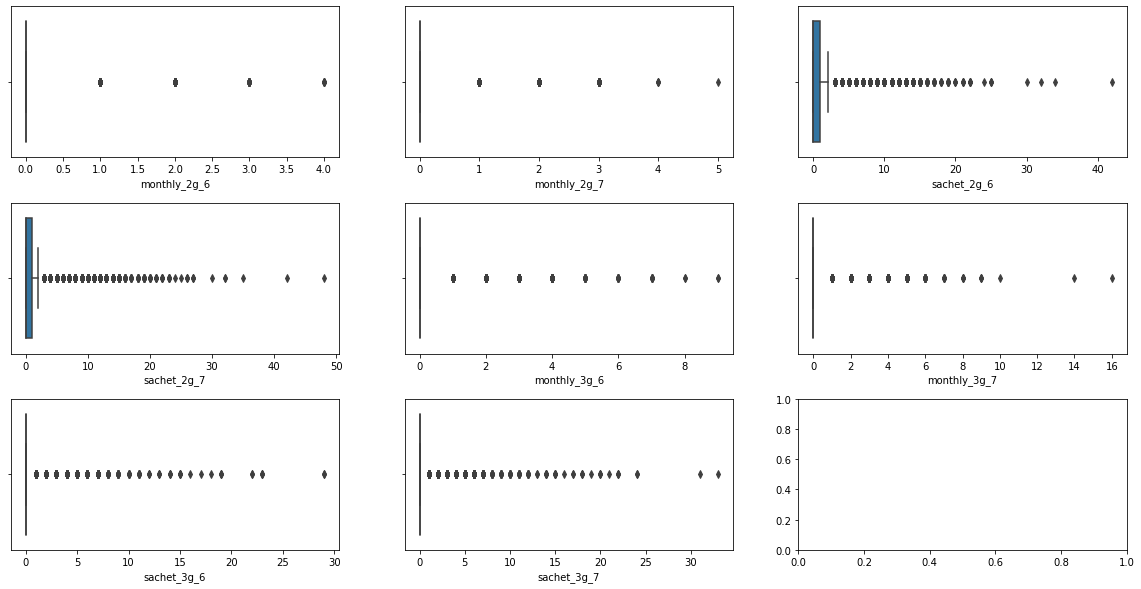

In [1262]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

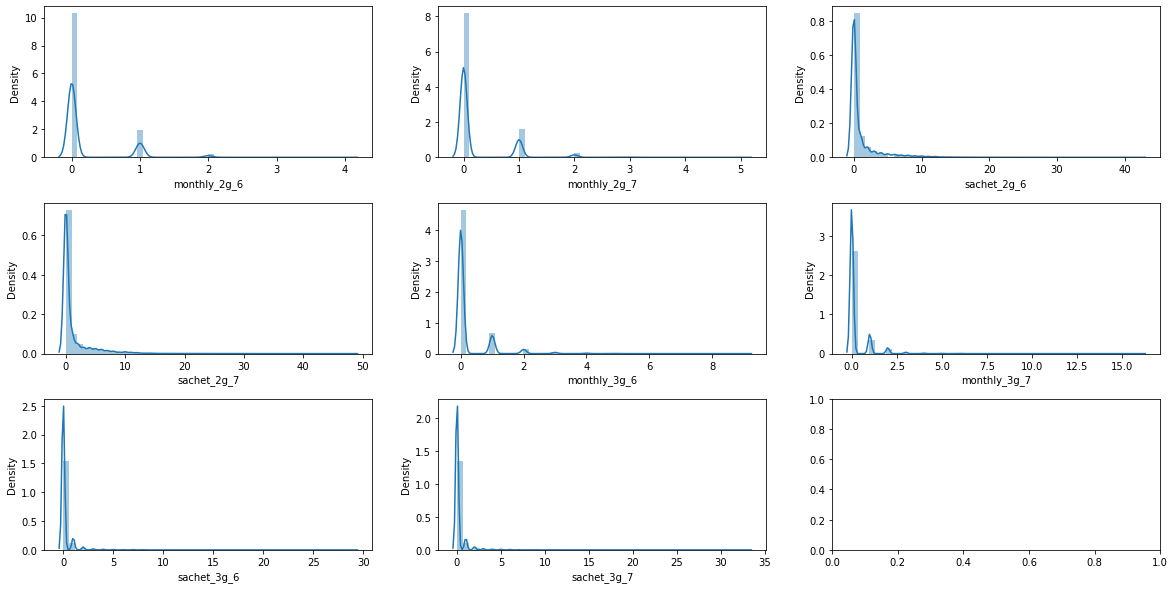

In [1263]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [1264]:
df_new[col_boxplot].skew().sort_values(ascending=False)

sachet_3g_6     11.313402
sachet_3g_7     11.006842
monthly_3g_7     5.162904
monthly_3g_6     4.130411
sachet_2g_6      3.696590
sachet_2g_7      3.650947
monthly_2g_6     2.367039
monthly_2g_7     2.320154
dtype: float64

In [1265]:
#The data shows high skew and has lots of outliers. Transforming to log scale also did not help too. We will be doing outlier
#capping later and also scaling the data. No Action taken a we will be making changes later


count    21000.000000
mean      1185.625000
std        959.407619
min        149.000000
25%        429.000000
50%        826.000000
75%       1760.000000
max       4290.000000
Name: aon, dtype: float64

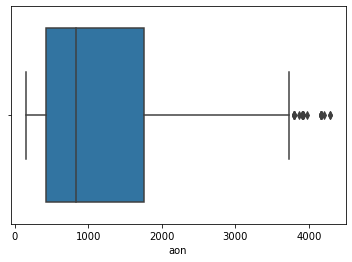

In [1266]:
sns.boxplot(df_new['aon'])   
df_new['aon'].describe()

<AxesSubplot:xlabel='aon', ylabel='Density'>

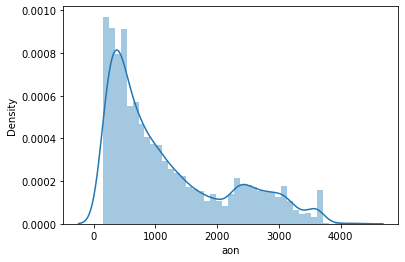

In [1267]:
sns.distplot(df_new['aon'])   


In [1268]:
testlist_log=df_new['aon']
testlist_sqrt = df_new['aon']

<AxesSubplot:xlabel='aon', ylabel='Density'>

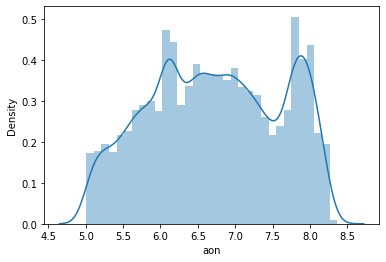

In [1269]:
testlist_log=np.log(testlist_log)
sns.distplot(testlist_log)   


<AxesSubplot:xlabel='aon', ylabel='Density'>

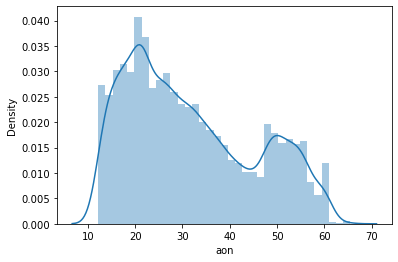

In [1270]:
testlist_sqrt=np.sqrt(testlist_sqrt)
sns.distplot(testlist_sqrt)   

In [1271]:
#The data shows high skew and has lots of outliers. Transforming to log and Sqrt also did not help and ended up causing multiple peaks.
#We will be doing outlier capping later and also scaling the data. No Action taken a we will be making changes later

In [1272]:
 col_boxplot=['arpu_average','onnet_mou_average','offnet_mou_average', 'vol_2g_mb_average','vol_3g_mb_average','vbc_3g_average']

In [1273]:
df_new[col_boxplot].describe()

arpu_average  onnet_mou_average  offnet_mou_average  vol_2g_mb_average  \
count  21000.000000       21000.000000        21000.000000       21000.000000   
mean     546.153607         254.249627          361.935035         128.052439   
std      453.567599         444.292867          456.372087         298.216269   
min     -451.713500           0.000000            0.000000           0.000000   
25%      304.838250          16.468750           68.853750           0.000000   
50%      483.337250          79.745000          211.542500          11.515000   
75%      673.550875         279.440000          481.776250         113.778750   
max    31438.461000        7331.060000         7124.750000        7939.075000   

       vol_3g_mb_average  vbc_3g_average  
count       21000.000000    21000.000000  
mean          389.697441      199.475995  
std           863.405889      405.572427  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%             0.000000        0.000000  
75%           522.041250      254.907500  
max         36667.845000     8190.585000

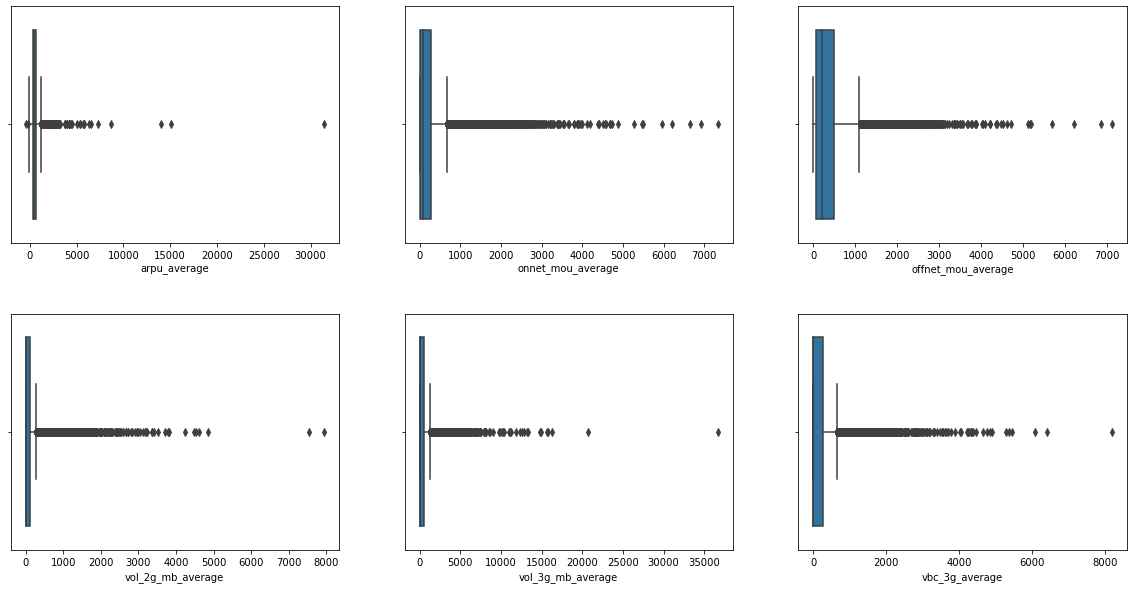

In [1274]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

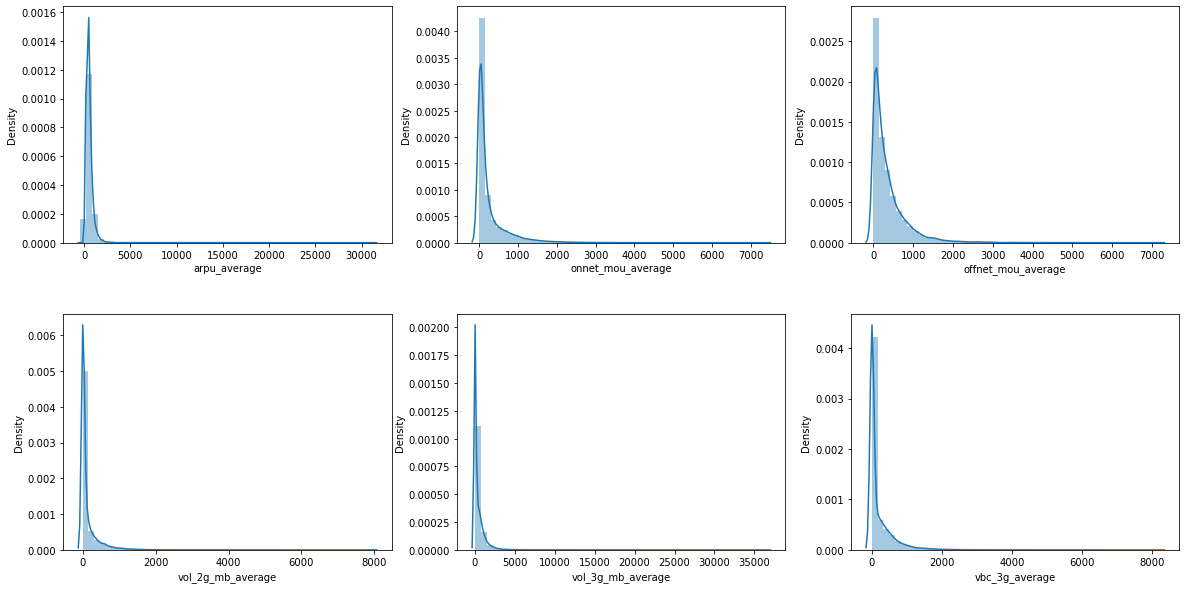

In [1275]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [1276]:
df_new[col_boxplot].skew().sort_values(ascending=False)

arpu_average          19.943502
vol_3g_mb_average      9.194089
vol_2g_mb_average      5.971905
vbc_3g_average         4.355152
onnet_mou_average      3.978694
offnet_mou_average     3.185029
dtype: float64

In [1277]:
# Extereme skew in Arpu. Other data is also skewed and outliers oresent

In [1278]:
col_boxplot= ['roam_og_mou_average','loc_og_t2t_mou_average','loc_og_t2m_mou_average','loc_og_t2f_mou_average','loc_og_t2c_mou_average','loc_og_mou_average','std_og_t2t_mou_average','std_og_t2m_mou_average','std_og_t2f_mou_average','std_og_mou_average','isd_og_mou_average','spl_og_mou_average','og_others_average','total_og_mou_average']

In [1279]:
df_new[col_boxplot].describe()

roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         21000.000000            21000.000000            21000.000000   
mean             23.358456               82.675809              157.095066   
std              94.646522              223.088195              227.710227   
min               0.000000                0.000000                0.000000   
25%               0.000000                5.910000               22.792500   
50%               0.000000               24.685000               76.972500   
75%               3.047500               75.641250              199.481250   
max            2410.835000             5941.565000             4150.165000   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            21000.000000            21000.000000        21000.000000   
mean                 6.197118                1.708795          245.976252   
std                 19.036747                6.638899          357.589198   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           37.071250   
50%                  0.680000                0.000000          121.685000   
75%                  4.625000                1.136250          316.661250   
max                708.070000              420.575000         6582.420000   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            21000.000000            21000.000000            21000.000000   
mean               162.311514              175.982599                1.669326   
std                387.743683              389.739520               10.912804   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.776000               16.375500                0.000000   
75%                105.020000              152.887500                0.000000   
max               7308.050000             7037.535000              382.920000   

       std_og_mou_average  isd_og_mou_average  spl_og_mou_average  \
count        21000.000000        21000.000000        21000.000000   
mean           339.966985            2.283623            6.433925   
std            584.569949           51.768798           18.323745   
min              0.000000            0.000000            0.000000   
25%              1.290000            0.000000            0.000000   
50%             39.022500            0.000000            1.720000   
75%            472.136250            0.000000            6.821250   
max           7323.595000         5695.470000         1144.500000   

       og_others_average  total_og_mou_average  
count       21000.000000          21000.000000  
mean            0.339878            593.720534  
std             2.511622            660.881876  
min             0.000000              0.000000  
25%             0.000000            106.747500  
50%             0.000000            398.595000  
75%             0.000000            874.746250  
max           304.905000           7441.790000

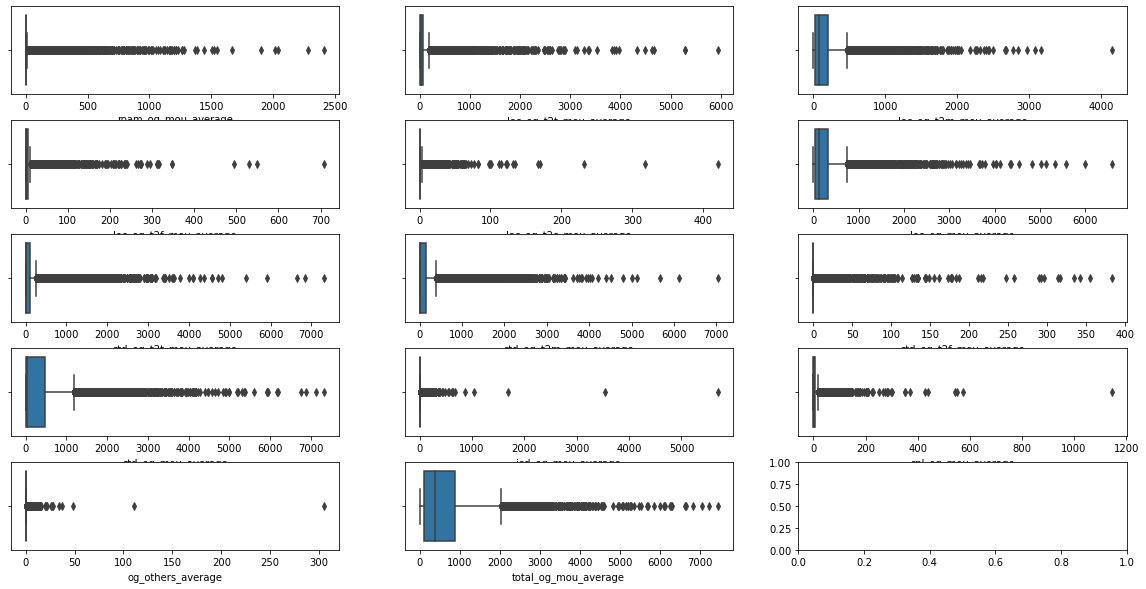

In [1280]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

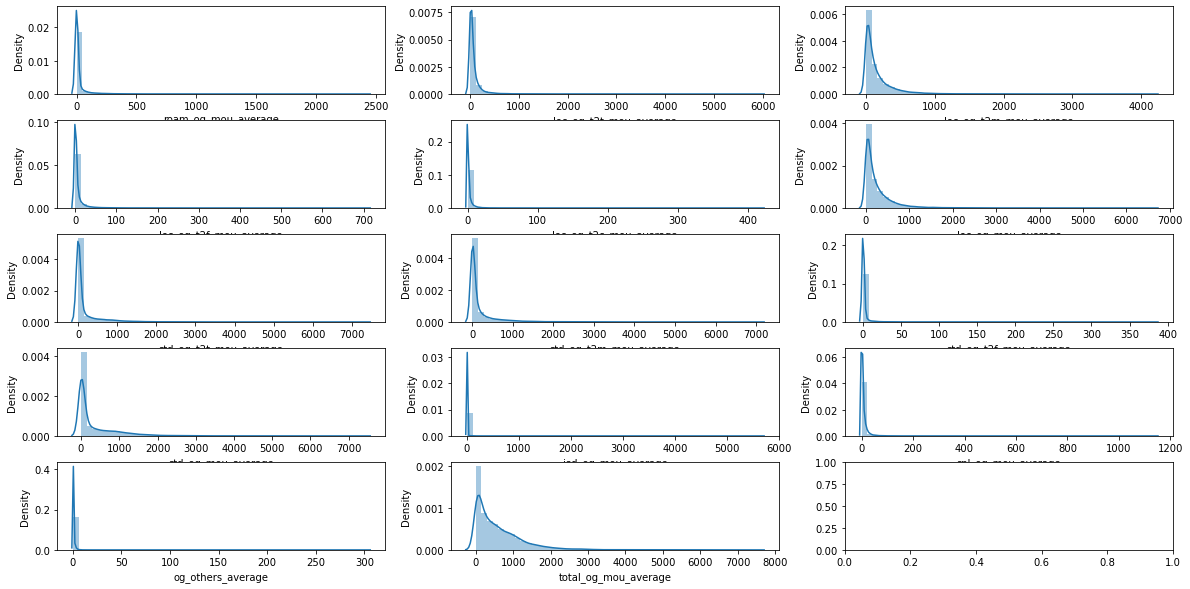

In [1281]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [1282]:
df_new[col_boxplot].skew().sort_values(ascending=False)

og_others_average         90.210975
isd_og_mou_average        81.745532
loc_og_t2c_mou_average    24.820840
spl_og_mou_average        20.894062
std_og_t2f_mou_average    17.884633
loc_og_t2f_mou_average    11.098567
loc_og_t2t_mou_average     9.651555
roam_og_mou_average        9.104734
std_og_t2t_mou_average     4.557012
std_og_t2m_mou_average     4.354557
loc_og_mou_average         4.202466
loc_og_t2m_mou_average     3.754585
std_og_mou_average         2.930968
total_og_mou_average       2.351124
dtype: float64

In [1283]:
# This variables also have the same positive skew and have outliers present

In [1284]:
col_boxplot=['roam_ic_mou_average', 'loc_ic_t2t_mou_average','loc_ic_t2m_mou_average','loc_ic_t2f_mou_average','loc_ic_mou_average','std_ic_t2t_mou_average','std_ic_t2m_mou_average','std_ic_t2f_mou_average','std_ic_mou_average','total_ic_mou_average','spl_ic_mou_average','isd_ic_mou_average','ic_others_average']
df_new[col_boxplot].describe()

roam_ic_mou_average  loc_ic_t2t_mou_average  loc_ic_t2m_mou_average  \
count         21000.000000            21000.000000            21000.000000   
mean             14.338586               65.171892              147.931686   
std              67.182971              151.767485              198.648691   
min               0.000000                0.000000                0.000000   
25%               0.000000                8.606250               33.732500   
50%               0.000000               26.540000               85.950000   
75%               1.670500               67.838750              186.517500   
max            3060.600000             4015.490000             4238.885000   

       loc_ic_t2f_mou_average  loc_ic_mou_average  std_ic_t2t_mou_average  \
count            21000.000000        21000.000000            21000.000000   
mean                16.180332          229.293712               14.393460   
std                 44.635304          291.890132               69.949213   
min                  0.000000            0.000000                0.000000   
25%                  0.265000           55.510000                0.000000   
50%                  2.885000          137.017500                1.230000   
75%                 13.366250          294.758750                9.245000   
max               1236.920000         6556.670000             3776.720000   

       std_ic_t2m_mou_average  std_ic_t2f_mou_average  std_ic_mou_average  \
count            21000.000000            21000.000000        21000.000000   
mean                28.814448                2.842916           46.054337   
std                 88.200024               18.552011          126.409497   
min                  0.000000                0.000000            0.000000   
25%                  0.675000                0.000000            2.380000   
50%                  6.440000                0.000000           13.477500   
75%                 24.943750                0.765000           42.296250   
max               2625.405000             1185.045000         5337.500000   

       total_ic_mou_average  spl_ic_mou_average  isd_ic_mou_average  \
count          21000.000000        21000.000000        21000.000000   
mean             286.279351            0.039949           10.794937   
std              341.547464            0.148567           69.911133   
min                0.000000            0.000000            0.000000   
25%               81.343750            0.000000            0.000000   
50%              185.065000            0.000000            0.000000   
75%              368.797500            0.015000            0.580000   
max             7579.500000           16.610000         5651.025000   

       ic_others_average  
count       21000.000000  
mean            1.373338  
std            15.478124  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.230000  
max          1420.040000

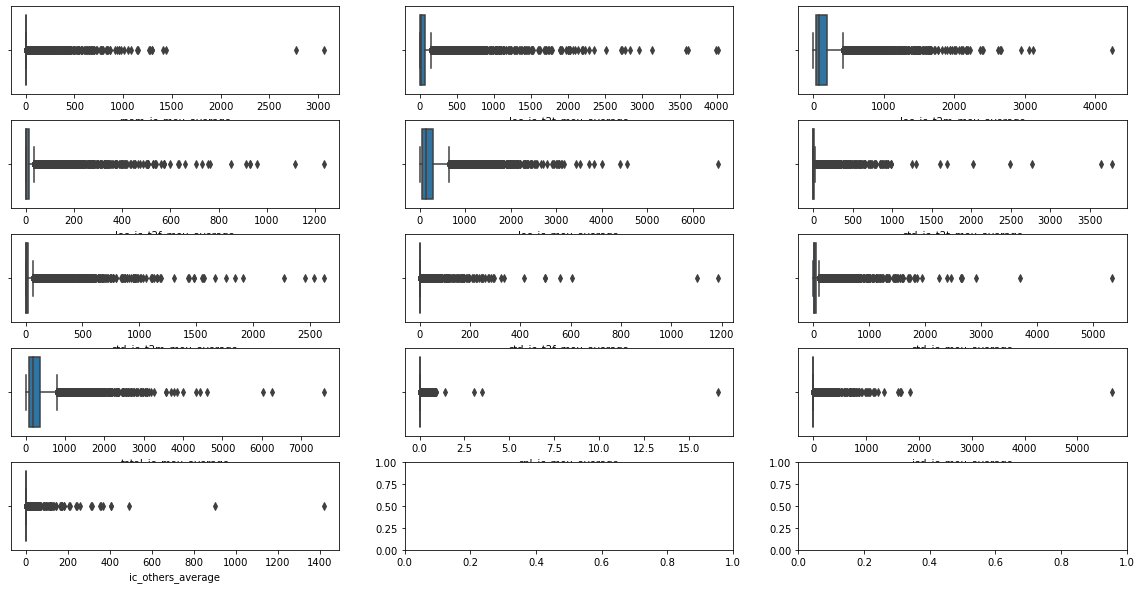

In [1285]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

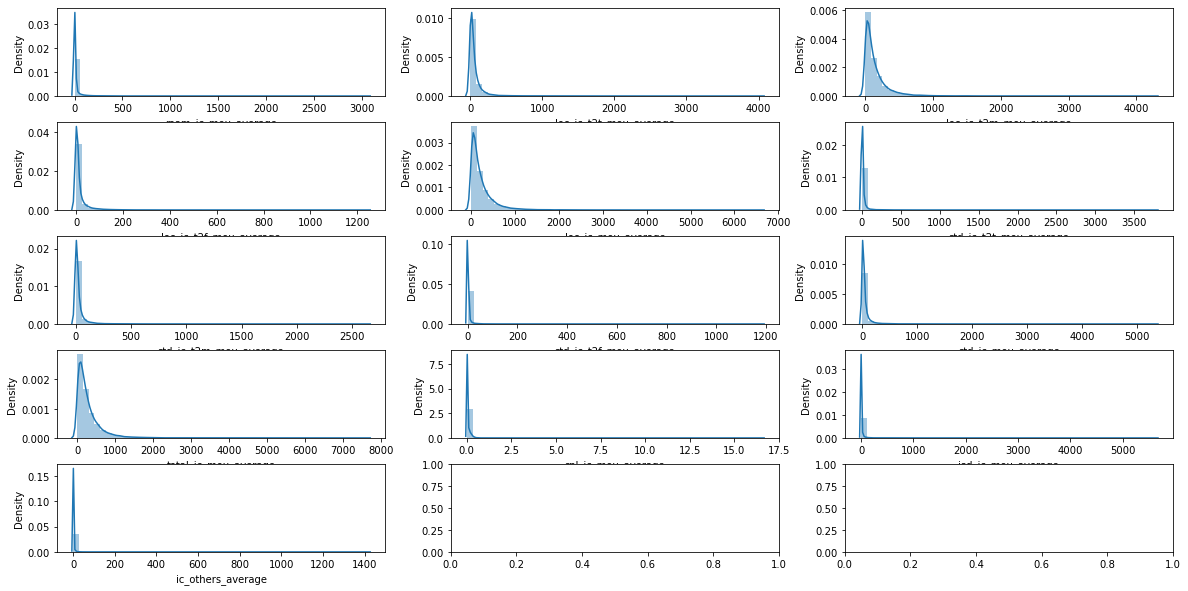

In [1286]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [1287]:
df_new[col_boxplot].skew().sort_values(ascending=False)

spl_ic_mou_average        67.768644
ic_others_average         53.550290
isd_ic_mou_average        32.753921
std_ic_t2f_mou_average    31.417281
std_ic_t2t_mou_average    25.396846
roam_ic_mou_average       15.139592
std_ic_mou_average        11.915110
std_ic_t2m_mou_average    11.449125
loc_ic_t2t_mou_average     9.956465
loc_ic_t2f_mou_average     8.926886
loc_ic_t2m_mou_average     4.423767
loc_ic_mou_average         4.077741
total_ic_mou_average       3.970316
dtype: float64

In [1288]:
# This variables also have the same positive skew and have outliers present

In [1289]:
col_boxplot=['total_rech_num_average','total_rech_amt_average','max_rech_amt_average','total_rech_data_average','max_rech_data_average','last_day_rch_amt_average','count_rech_2g_average','count_rech_3g_average','av_rech_amt_data_average']
df_new[col_boxplot].describe()

total_rech_num_average  total_rech_amt_average  max_rech_amt_average  \
count            21000.000000            21000.000000          21000.000000   
mean                11.455357              643.572548            169.609714   
std                  8.605945              538.143808            149.038593   
min                  0.000000                0.000000              0.000000   
25%                  6.000000              354.500000            102.000000   
50%                  9.000000              568.500000            128.000000   
75%                 14.000000              795.000000            198.000000   
max                122.500000            37762.500000           3299.000000   

       total_rech_data_average  max_rech_data_average  \
count             21000.000000           21000.000000   
mean                  1.787310              84.345500   
std                   2.716016             102.773012   
min                   0.000000               0.000000   
25%                   0.000000               0.000000   
50%                   1.000000              43.500000   
75%                   2.000000             153.000000   
max                  54.500000            1555.000000   

       last_day_rch_amt_average  count_rech_2g_average  count_rech_3g_average  \
count              21000.000000           21000.000000           21000.000000   
mean                  98.816643               1.334714               0.452595   
std                  114.459698               2.405114               1.120487   
min                    0.000000               0.000000               0.000000   
25%                   30.000000               0.000000               0.000000   
50%                   76.000000               0.500000               0.000000   
75%                  124.000000               1.500000               0.500000   
max                 3100.000000              38.500000              26.500000   

       av_rech_amt_data_average  
count              21000.000000  
mean                 140.892431  
std                  180.259076  
min                    0.000000  
25%                    0.000000  
50%                  107.000000  
75%                  212.500000  
max                 5142.500000

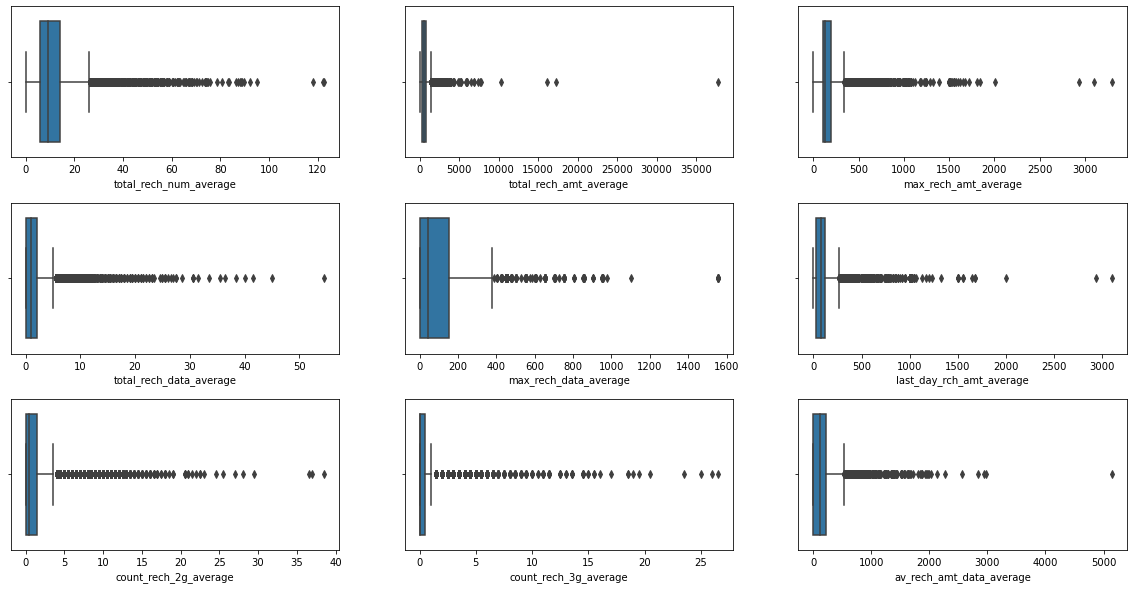

In [1290]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()


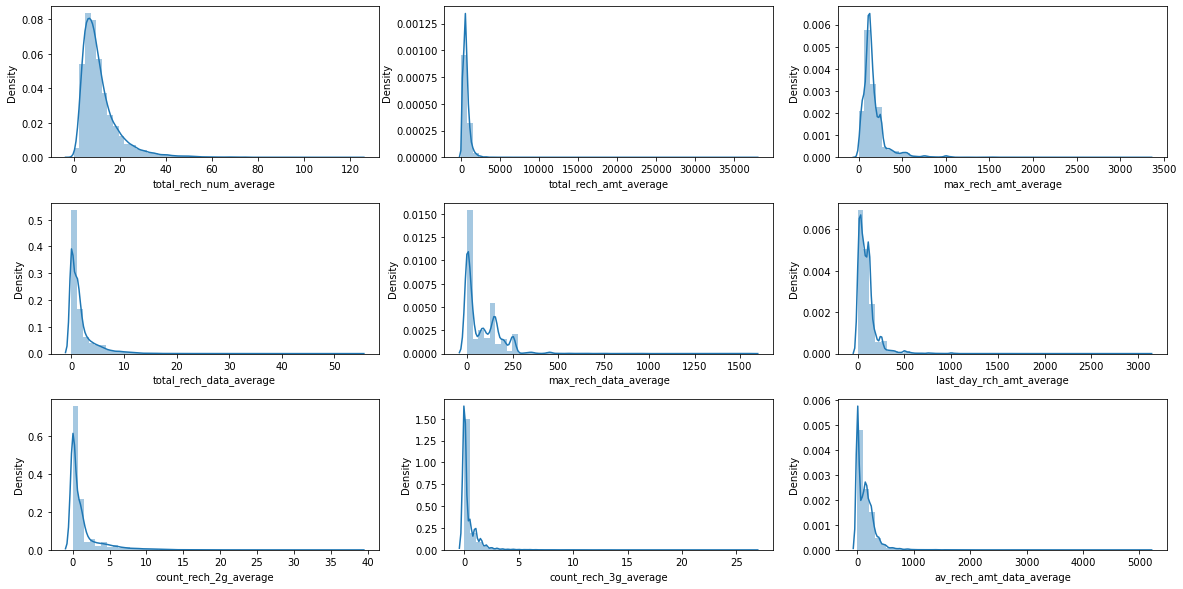

In [1291]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()


In [1292]:
df_new[col_boxplot].skew().sort_values(ascending=False)

total_rech_amt_average      20.202846
count_rech_3g_average        7.612218
last_day_rch_amt_average     5.538574
max_rech_amt_average         4.442049
av_rech_amt_data_average     4.348461
total_rech_data_average      3.998328
count_rech_2g_average        3.478228
max_rech_data_average        2.786630
total_rech_num_average       2.757097
dtype: float64

In [1293]:
# Positive skew and extreme outliers present

0.0    19272
1.0     1728
Name: churn_probability, dtype: int64
0.0    91.77
1.0     8.23
Name: churn_probability, dtype: float64


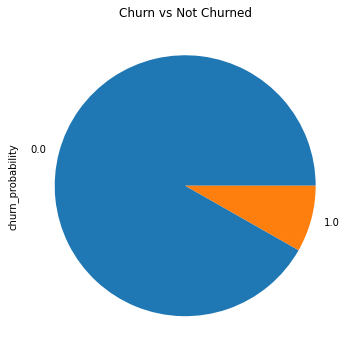

In [1294]:
df_new['churn_probability'].value_counts().plot(kind='pie',figsize=[12,6],title='Churn vs Not Churned')
print(df_new['churn_probability'].value_counts())
print(round((df_new['churn_probability'].value_counts()*100 / df_new.shape[0]),2))

In [1295]:
#91.77 of the customers given haven't churned

0.0    98.62381
1.0     1.37619
Name: night_pck_user_6, dtype: float64


<AxesSubplot:>

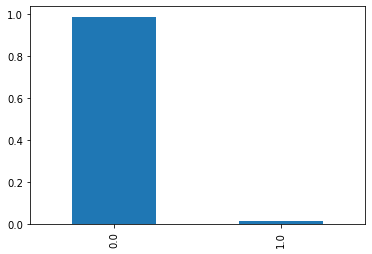

In [1296]:
print(df_new['night_pck_user_6'].value_counts(normalize=True)*100)
df_new['night_pck_user_6'].value_counts(normalize=True).plot(kind='bar')

0.0    98.690476
1.0     1.309524
Name: night_pck_user_7, dtype: float64


<AxesSubplot:>

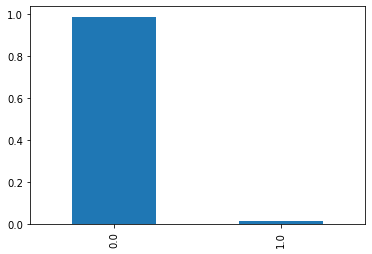

In [1297]:
print(df_new['night_pck_user_7'].value_counts(normalize=True)*100)
df_new['night_pck_user_7'].value_counts(normalize=True).plot(kind='bar')

In [1298]:
#Only 1.37% of the users use nightpack in month 6 and 1.30 in month 8


1.0    55.166667
0.0    44.833333
Name: fb_user_6, dtype: float64


<AxesSubplot:>

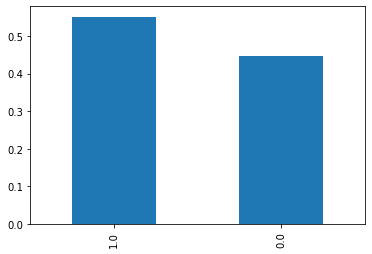

In [1299]:
print(df_new['fb_user_6'].value_counts(normalize=True)*100)
df_new['fb_user_6'].value_counts(normalize=True).plot(kind='bar')

1.0    55.685714
0.0    44.314286
Name: fb_user_7, dtype: float64


<AxesSubplot:>

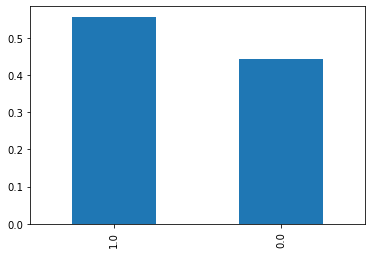

In [1300]:
print(df_new['fb_user_7'].value_counts(normalize=True)*100)
df_new['fb_user_7'].value_counts(normalize=True).plot(kind='bar')

In [1301]:
# The percentage of FB users are consistent among both 6 and 7 month

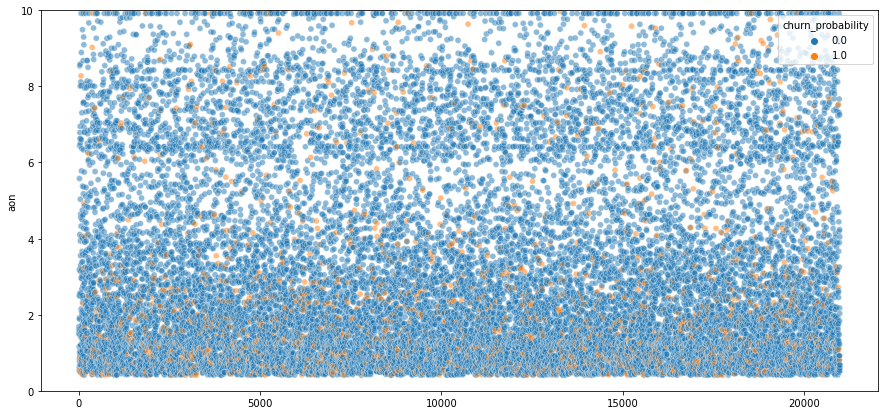

In [1302]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df_new['aon']/365, x=df_new.index, hue=df_new.churn_probability, alpha=0.5)
plt.ylim(0,10)
plt.show()

In [1303]:
#Churn is higher when aon is lower

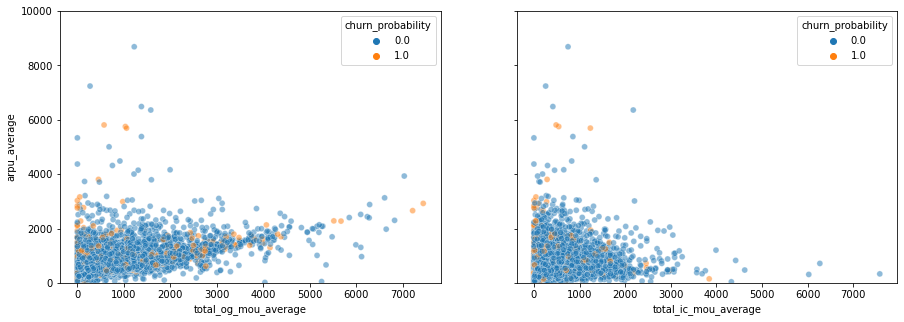

In [1304]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(y='arpu_average', x='total_og_mou_average', data=df_new, ax=axes[0], hue='churn_probability', alpha=0.5)
sns.scatterplot(y='arpu_average', x='total_ic_mou_average', data=df_new, ax=axes[1], hue='churn_probability', alpha=0.5)
plt.ylim(0,10000)
plt.show()

In [1228]:
#There is no linear relationship between Arpu and IC and OG, also so visual impact is seen on churn

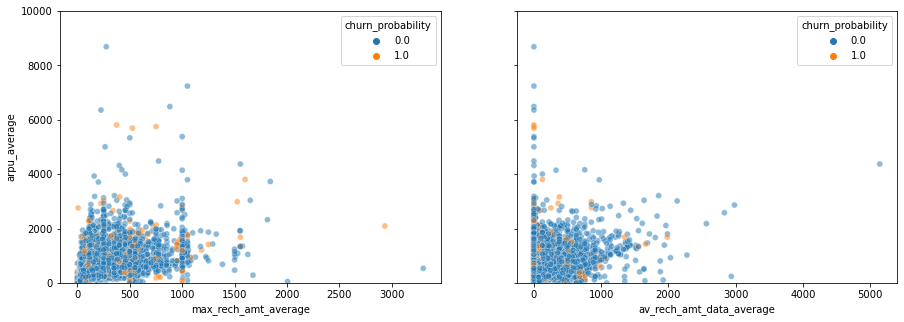

In [1229]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(y='arpu_average', x='max_rech_amt_average', data=df_new, ax=axes[0], hue='churn_probability', alpha=0.5)
sns.scatterplot(y='arpu_average', x='av_rech_amt_data_average', data=df_new, ax=axes[1], hue='churn_probability', alpha=0.5)
plt.ylim(0,10000)
plt.show()

In [1230]:
#There is no obvious linear relation that is seen. Also churn is not concentrated in a particular cluster

In [1505]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [1629]:
#df_new_backup_top=df_new.copy(deep=True)
df_PCA=df_new_backup_top.copy(deep=True) ## For PCA later without multicollinearity removal

In [1508]:
#Capping Outliers
df_new[num_cols] = df_new[num_cols].apply(cap_outliers, axis=0)

Text(0.5, 1.0, 'Heatmap showing corelations between variables')

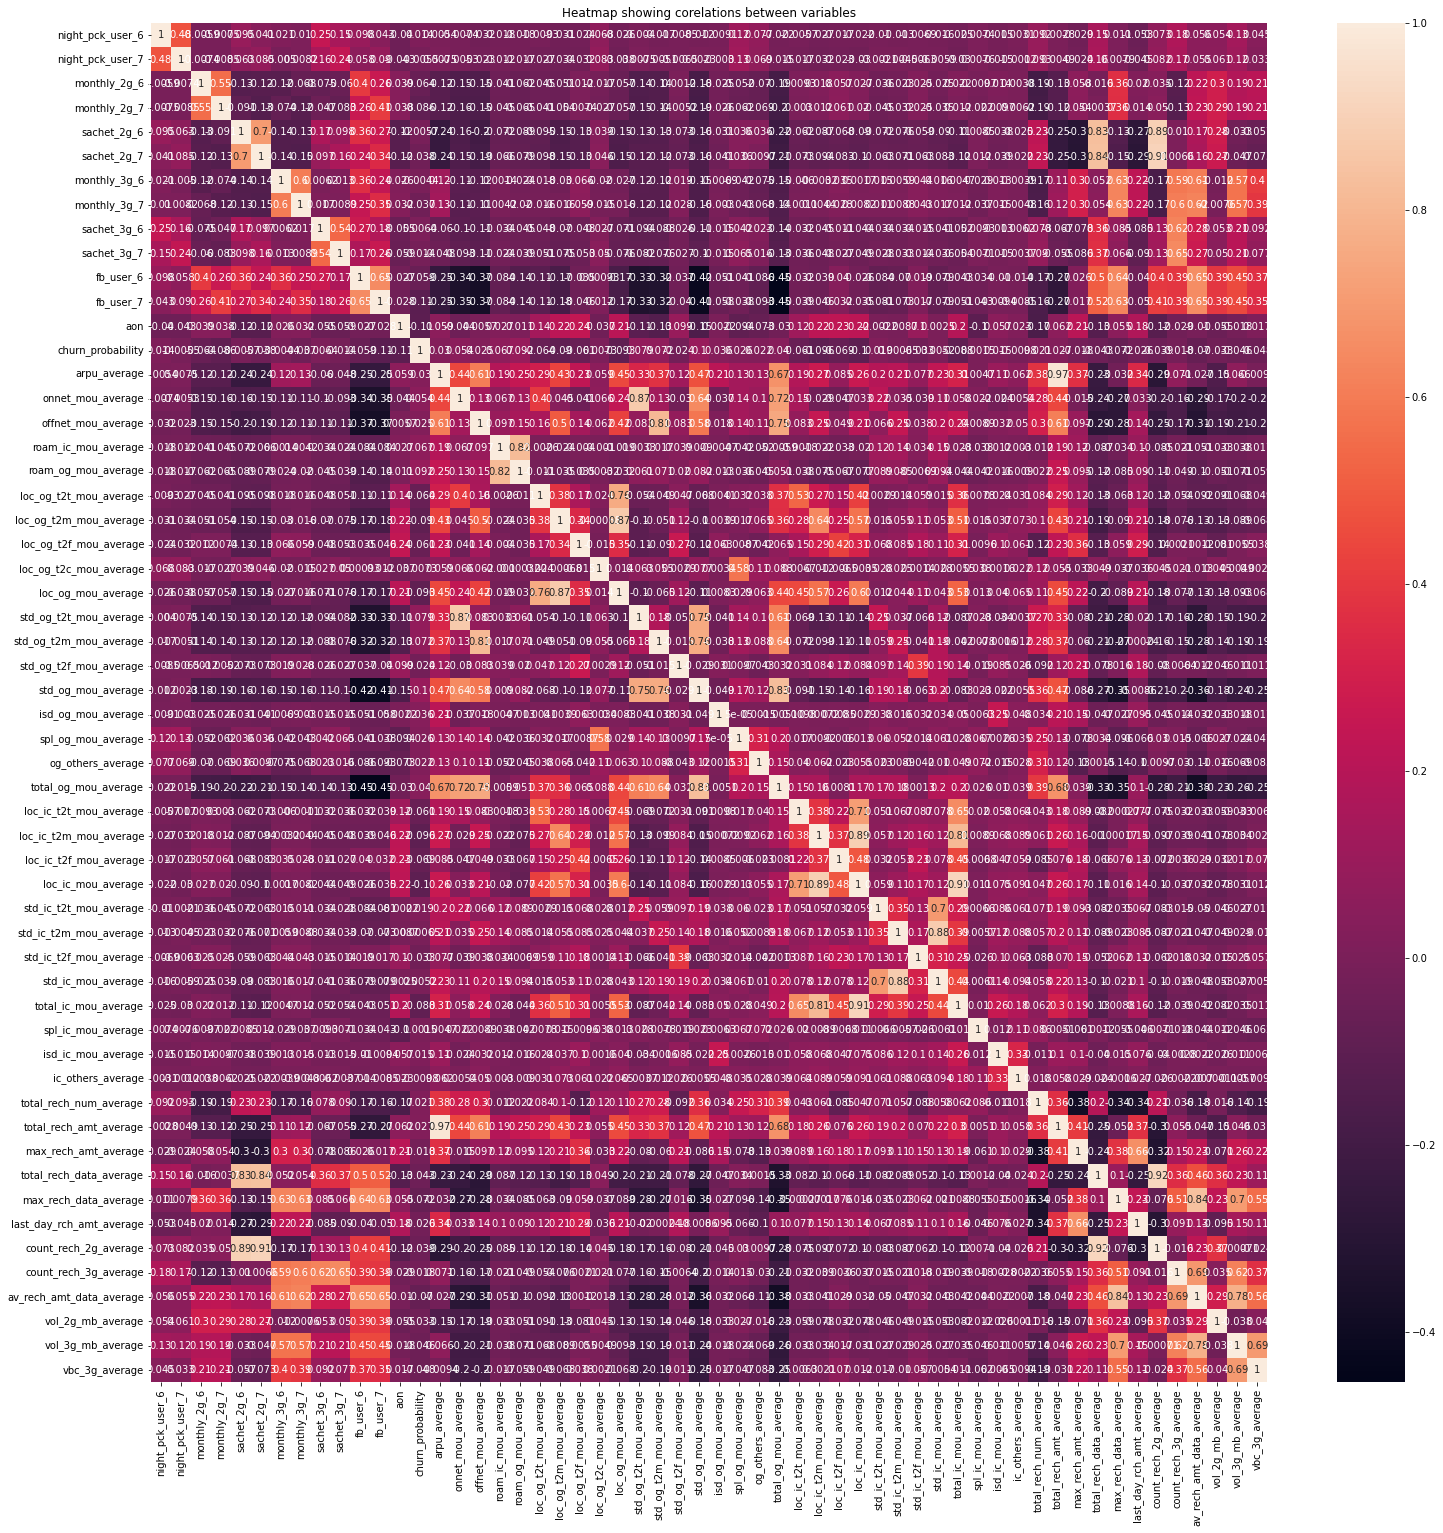

In [1509]:
plt.figure(figsize=[25,25])
cor1=df_new.corr(method='pearson')
sns.heatmap(cor1,annot=True,)
plt.title('Heatmap showing corelations between variables')


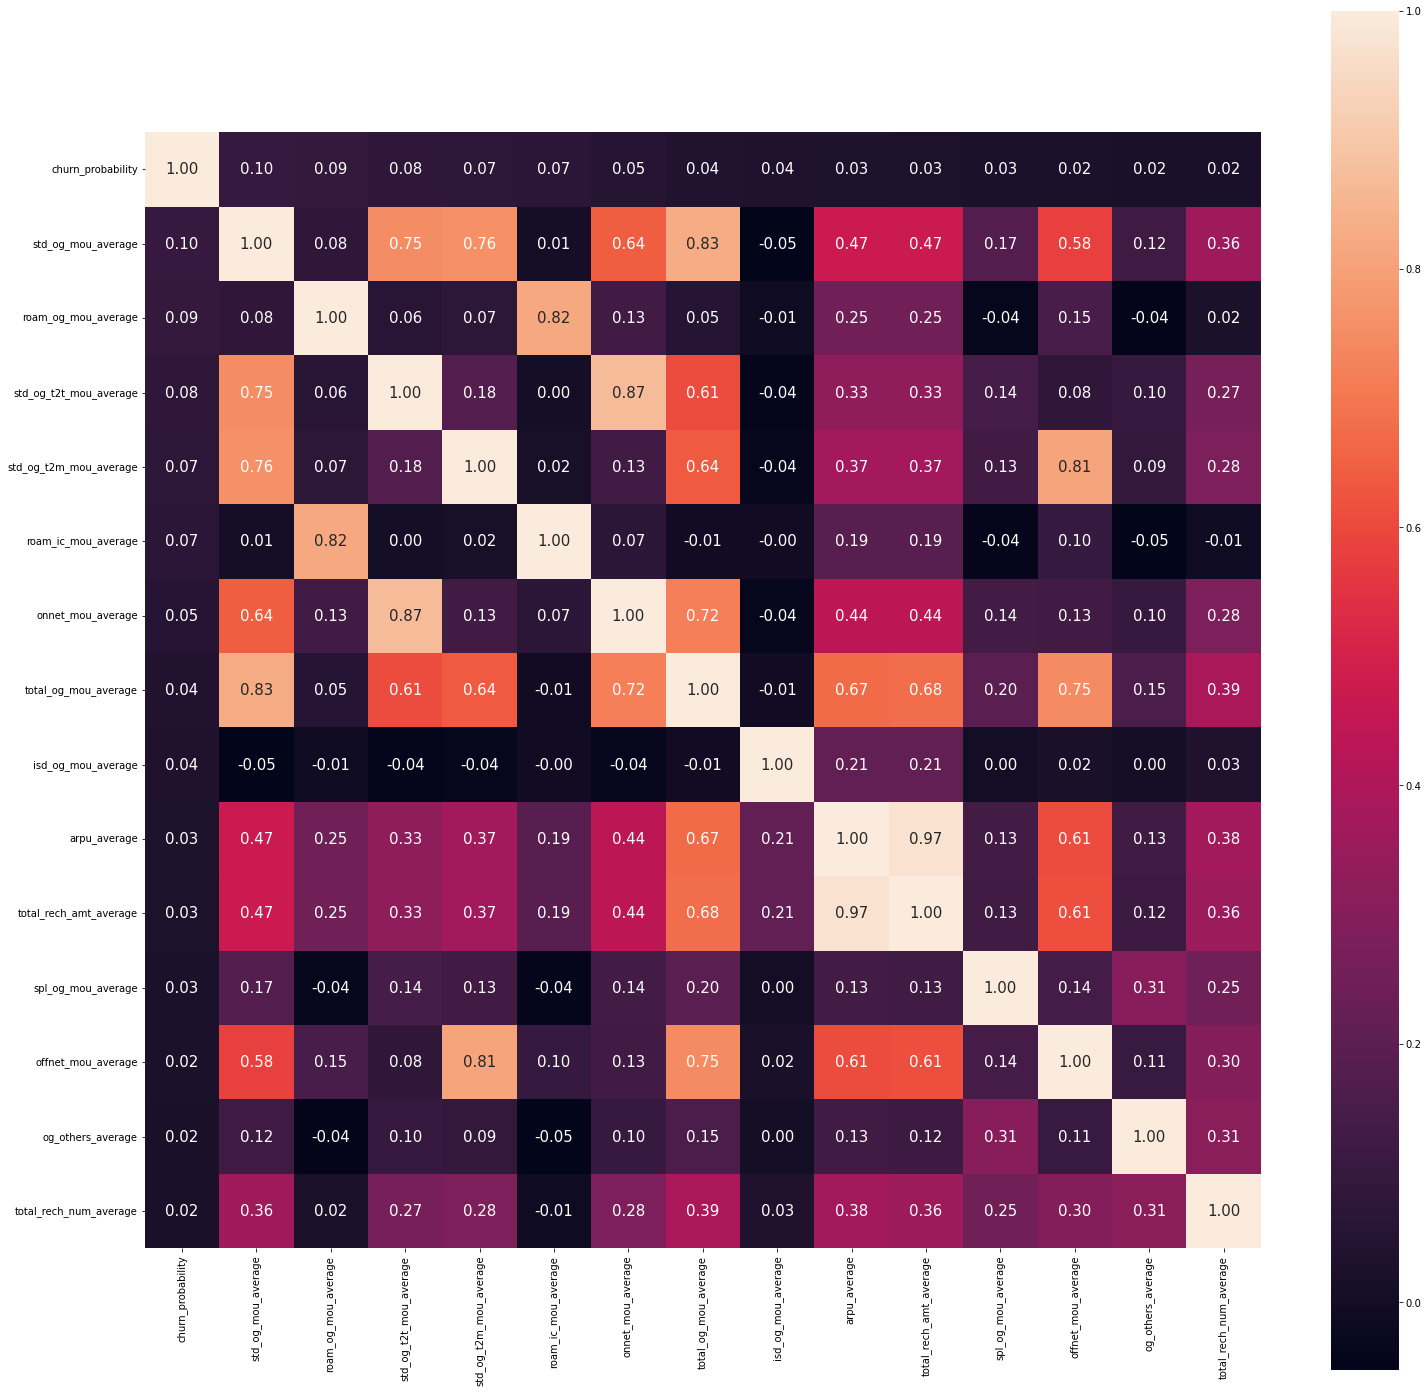

In [1510]:
#The above heatmap is too big and not easily intrepeted so lets check the heat map with only top 15 co-related variables with CHurn
corrmat = df_new.corr()
cols = corrmat.nlargest(15, 'churn_probability')['churn_probability'].index
cm = np.corrcoef(df_new[cols].values.T)
plt.figure(figsize=[25,25])
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1513]:
#Lets Drop all variables from the upper triangle that are more than 75% corelated
corr_matrix = df_new.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.60)]
col_to_drop

['sachet_2g_7',
 'fb_user_7',
 'offnet_mou_average',
 'roam_og_mou_average',
 'loc_og_mou_average',
 'std_og_t2t_mou_average',
 'std_og_t2m_mou_average',
 'std_og_mou_average',
 'total_og_mou_average',
 'loc_ic_t2m_mou_average',
 'loc_ic_mou_average',
 'std_ic_mou_average',
 'total_ic_mou_average',
 'total_rech_amt_average',
 'total_rech_data_average',
 'max_rech_data_average',
 'last_day_rch_amt_average',
 'count_rech_2g_average',
 'count_rech_3g_average',
 'av_rech_amt_data_average',
 'vol_3g_mb_average',
 'vbc_3g_average']

In [1514]:
#Dropping Highly Corelated Variables
df_new.drop(col_to_drop,axis=1,inplace=True)

In [1515]:
num_cols = [i for i in num_cols if i not in col_to_drop]

In [1416]:
### rUN AFTER aboVE

In [1516]:
df_new
backupdf=df_new.copy(deep=True)

In [1517]:
backupdf2=backupdf.copy(deep=True)

In [1518]:
## Building Model Pre-Processing 

In [1519]:
# Putting feature variable to X
X = df_new.drop('churn_probability',axis=1)

# Putting response variable to y
y = df_new['churn_probability']

In [1520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y, random_state=42)
X_train.shape, X_test.shape

((14699, 33), (6301, 33))

In [1523]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14699, 33)
(6301, 33)
(14699,)
(6301,)


In [1524]:
y_train.value_counts()

0.0    13489
1.0     1210
Name: churn_probability, dtype: int64

In [1525]:
## Data imbalance is seen.
#There are 10663 data points that belong to class 0 and only 624 belong to class 1

### Correcting imbalance using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [1526]:
y_train.value_counts()

0.0    13489
1.0    13489
Name: churn_probability, dtype: int64

In [1325]:
#Class imbalance has been corrected

In [1326]:
# Scaling
## Scaling only continous data as defined by nums_col


In [1527]:
# Using Standard scalar
scaler = StandardScaler()
# Transforming and Fitting data on Train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#S Transforming without fitting on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [1425]:
### Modelling ###

In [1528]:
#Logistic Regression - Without PCA

In [1529]:
import statsmodels.api as sm

In [1530]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26978
Model:                            GLM   Df Residuals:                    26944
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16394.
Date:                Wed, 21 Dec 2022   Deviance:                       32789.
Time:                        07:28:37   Pearson chi2:                 2.76e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0137      0.028      0.490      0.624      -0.041       0.069
night_pck_user_6           0.2391      0.137      1.750      0.080      -0.029       0.507
night_pck_user_7          -0.2408      0.144     -1.676      0.094      -0.522       0.041
monthly_2g_6              -0.0940      0.019     -5.002      0.000      -0.131      -0.057
monthly_2g_7              -0.3696      0.017    -21.303      0.000      -0.404      -0.336
sachet_2g_6               -0.0646      0.018     -3.562      0.000      -0.100      -0.029
monthly_3g_6               0.0705      0.020      3.587      0.000       0.032       0.109
monthly_3g_7              -0.2667      0.017    -15.742      0.000      -0.300      -0.234
sachet_3g_6                0.0797      0.017      4.775      0.000       0.047       0.112
sachet_3g_7               -0.1082      0.016     -6.835      0.000      -0.139      -0.077
fb_user_6                 -0.1093      0.049     -2.247      0.025      -0.205      -0.014
aon                       -0.3072      0.015    -20.397      0.000      -0.337      -0.278
arpu_average               0.3697      0.025     15.025      0.000       0.321       0.418
onnet_mou_average         -0.0168      0.019     -0.903      0.367      -0.053       0.020
roam_ic_mou_average        0.0904      0.015      6.119      0.000       0.061       0.119
loc_og_t2t_mou_average    -0.2584      0.020    -12.612      0.000      -0.299      -0.218
loc_og_t2m_mou_average    -0.3929      0.019    -20.596      0.000      -0.430      -0.356
loc_og_t2f_mou_average    -0.1011      0.019     -5.378      0.000      -0.138      -0.064
loc_og_t2c_mou_average    -0.0346      0.017     -2.077      0.038      -0.067      -0.002
std_og_t2f_mou_average    -0.0219      0.016     -1.382      0.167      -0.053       0.009
isd_og_mou_average         0.0489      0.017      2.933      0.003       0.016       0.082
spl_og_mou_average         0.0786      0.018      4.380      0.000       0.043       0.114
og_others_average          0.0421      0.015      2.818      0.005       0.013       0.071
loc_ic_t2t_mou_average    -0.0152      0.017     -0.897      0.369      -0.049       0.018
loc_ic_t2f_mou_average    -0.1206      0.018     -6.882      0.000      -0.155      -0.086
std_ic_t2t_mou_average     0.0121      0.015      0.806      0.420      -0.017       0.041
std_ic_t2m_mou_average    -0.0926      0.015     -6.246      0.000      -0.122      -0.064
std_ic_t2f_mou_average    -0.0415      0.016     -2.578      0.010      -0.073      -0.010
spl_ic_mou_average        -0.0095      0.013     -0.706      0.480      -0.036       0.017
isd_ic_mou_average         0.0120      0.015      0.784      0.433      -0.018       0.042
ic_others_average         -0.0325      0.015     -2.193      0.028      -0.061  

In [1531]:
# As seen above the P values for a lot of variables are too high, so we will use RFE and use p-value/VIF to further refine the model

In [1532]:
###  Feature Selection Using RFE

In [1533]:
logreg = LogisticRegression()


In [1534]:
rfe = RFE(logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [1535]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('night_pck_user_6', True, 1),
 ('night_pck_user_7', True, 1),
 ('monthly_2g_6', False, 5),
 ('monthly_2g_7', True, 1),
 ('sachet_2g_6', False, 7),
 ('monthly_3g_6', True, 1),
 ('monthly_3g_7', True, 1),
 ('sachet_3g_6', True, 1),
 ('sachet_3g_7', True, 1),
 ('fb_user_6', True, 1),
 ('aon', True, 1),
 ('arpu_average', True, 1),
 ('onnet_mou_average', False, 16),
 ('roam_ic_mou_average', False, 3),
 ('loc_og_t2t_mou_average', True, 1),
 ('loc_og_t2m_mou_average', True, 1),
 ('loc_og_t2f_mou_average', True, 1),
 ('loc_og_t2c_mou_average', False, 12),
 ('std_og_t2f_mou_average', False, 14),
 ('isd_og_mou_average', False, 9),
 ('spl_og_mou_average', False, 6),
 ('og_others_average', False, 11),
 ('loc_ic_t2t_mou_average', False, 15),
 ('loc_ic_t2f_mou_average', True, 1),
 ('std_ic_t2t_mou_average', False, 18),
 ('std_ic_t2m_mou_average', False, 2),
 ('std_ic_t2f_mou_average', False, 10),
 ('spl_ic_mou_average', False, 19),
 ('isd_ic_mou_average', False, 17),
 ('ic_others_average', False, 

In [1536]:
col = X_train.columns[rfe.support_]

In [1537]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26978
Model:                            GLM   Df Residuals:                    26962
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16496.
Date:                Wed, 21 Dec 2022   Deviance:                       32991.
Time:                        07:28:43   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1211      0.022      5.430      0.000       0.077       0.165
night_pck_user_6           0.2733      0.136      2.016      0.044       0.008       0.539
night_pck_user_7          -0.2222      0.142     -1.564      0.118      -0.501       0.056
monthly_2g_7              -0.4125      0.016    -26.372      0.000      -0.443      -0.382
monthly_3g_6               0.1146      0.018      6.519      0.000       0.080       0.149
monthly_3g_7              -0.2723      0.017    -16.442      0.000      -0.305      -0.240
sachet_3g_6                0.1014      0.016      6.194      0.000       0.069       0.133
sachet_3g_7               -0.1115      0.016     -7.102      0.000      -0.142      -0.081
fb_user_6                 -0.3268      0.035     -9.253      0.000      -0.396      -0.258
aon                       -0.3068      0.015    -20.795      0.000      -0.336      -0.278
arpu_average               0.3734      0.018     20.768      0.000       0.338       0.409
loc_og_t2t_mou_average    -0.2712      0.017    -15.535      0.000      -0.305      -0.237
loc_og_t2m_mou_average    -0.4012      0.018    -22.229      0.000      -0.437      -0.366
loc_og_t2f_mou_average    -0.1184      0.018     -6.599      0.000      -0.154      -0.083
loc_ic_t2f_mou_average    -0.1359      0.017     -7.912      0.000      -0.170      -0.102
total_rech_num_average    -0.2055      0.016    -12.701      0.000      -0.237      -0.174
==========================================================================================
"""

In [1538]:
col=col.drop('night_pck_user_7')

In [1539]:
col

Index(['night_pck_user_6', 'monthly_2g_7', 'monthly_3g_6', 'monthly_3g_7',
       'sachet_3g_6', 'sachet_3g_7', 'fb_user_6', 'aon', 'arpu_average',
       'loc_og_t2t_mou_average', 'loc_og_t2m_mou_average',
       'loc_og_t2f_mou_average', 'loc_ic_t2f_mou_average',
       'total_rech_num_average'],
      dtype='object')

In [1540]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26978
Model:                            GLM   Df Residuals:                    26963
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16497.
Date:                Wed, 21 Dec 2022   Deviance:                       32993.
Time:                        07:28:48   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1196      0.022      5.370      0.000       0.076       0.163
night_pck_user_6           0.1895      0.124      1.526      0.127      -0.054       0.433
monthly_2g_7              -0.4132      0.016    -26.428      0.000      -0.444      -0.383
monthly_3g_6               0.1154      0.018      6.568      0.000       0.081       0.150
monthly_3g_7              -0.2727      0.017    -16.473      0.000      -0.305      -0.240
sachet_3g_6                0.1035      0.016      6.346      0.000       0.072       0.135
sachet_3g_7               -0.1172      0.015     -7.677      0.000      -0.147      -0.087
fb_user_6                 -0.3272      0.035     -9.265      0.000      -0.396      -0.258
aon                       -0.3062      0.015    -20.761      0.000      -0.335      -0.277
arpu_average               0.3728      0.018     20.744      0.000       0.338       0.408
loc_og_t2t_mou_average    -0.2706      0.017    -15.511      0.000      -0.305      -0.236
loc_og_t2m_mou_average    -0.4007      0.018    -22.207      0.000      -0.436      -0.365
loc_og_t2f_mou_average    -0.1183      0.018     -6.592      0.000      -0.153      -0.083
loc_ic_t2f_mou_average    -0.1363      0.017     -7.934      0.000      -0.170      -0.103
total_rech_num_average    -0.2059      0.016    -12.735      0.000      -0.238      -0.174
==========================================================================================
"""

In [1541]:
col=col.drop('night_pck_user_6')

In [1542]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26978
Model:                            GLM   Df Residuals:                    26964
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16498.
Date:                Wed, 21 Dec 2022   Deviance:                       32996.
Time:                        07:28:52   Pearson chi2:                 2.77e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1210      0.022      5.437      0.000       0.077       0.165
monthly_2g_7              -0.4126      0.016    -26.401      0.000      -0.443      -0.382
monthly_3g_6               0.1160      0.018      6.601      0.000       0.082       0.150
monthly_3g_7              -0.2734      0.017    -16.517      0.000      -0.306      -0.241
sachet_3g_6                0.1082      0.016      6.761      0.000       0.077       0.140
sachet_3g_7               -0.1172      0.015     -7.677      0.000      -0.147      -0.087
fb_user_6                 -0.3244      0.035     -9.199      0.000      -0.394      -0.255
aon                       -0.3062      0.015    -20.760      0.000      -0.335      -0.277
arpu_average               0.3731      0.018     20.764      0.000       0.338       0.408
loc_og_t2t_mou_average    -0.2700      0.017    -15.489      0.000      -0.304      -0.236
loc_og_t2m_mou_average    -0.4015      0.018    -22.260      0.000      -0.437      -0.366
loc_og_t2f_mou_average    -0.1184      0.018     -6.599      0.000      -0.154      -0.083
loc_ic_t2f_mou_average    -0.1361      0.017     -7.924      0.000      -0.170      -0.102
total_rech_num_average    -0.2041      0.016    -12.656      0.000      -0.236      -0.173
==========================================================================================
"""

In [1543]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1             monthly_3g_6  1.59
7             arpu_average  1.56
2             monthly_3g_7  1.49
9   loc_og_t2m_mou_average  1.48
12  total_rech_num_average  1.46
10  loc_og_t2f_mou_average  1.44
3              sachet_3g_6  1.41
4              sachet_3g_7  1.38
11  loc_ic_t2f_mou_average  1.30
5                fb_user_6  1.22
8   loc_og_t2t_mou_average  1.22
6                      aon  1.16
0             monthly_2g_7  1.09

In [1544]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.407768
1    0.328863
2    0.586102
3    0.534792
4    0.264941
5    0.675102
6    0.463152
7    0.423001
8    0.461396
9    0.545059
dtype: float64

In [1545]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40776764, 0.32886326, 0.58610236, 0.53479176, 0.26494051,
       0.67510214, 0.46315246, 0.42300078, 0.46139612, 0.54505907])

In [1546]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0    0.0    0.407768
1    0.0    0.328863
2    0.0    0.586102
3    0.0    0.534792
4    0.0    0.264941

In [1547]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [1548]:
# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0    0.0    0.407768          0
1    0.0    0.328863          0
2    0.0    0.586102          1
3    0.0    0.534792          1
4    0.0    0.264941          0

In [1549]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[ 8047  5442]
 [ 3422 10067]]
              precision    recall  f1-score   support

         0.0       0.70      0.60      0.64     13489
         1.0       0.65      0.75      0.69     13489

    accuracy                           0.67     26978
   macro avg       0.68      0.67      0.67     26978
weighted avg       0.68      0.67      0.67     26978



In [1550]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1551]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )


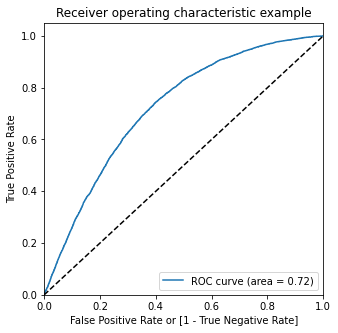

In [1450]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [1552]:
# Let's create columns with different probability cutoffs 
numbers = [float(j)/10 for j in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    0.0    0.407768          0    1    1    1    1    1    0    0    0    0   
1    0.0    0.328863          0    1    1    1    1    0    0    0    0    0   
2    0.0    0.586102          1    1    1    1    1    1    1    0    0    0   
3    0.0    0.534792          1    1    1    1    1    1    1    0    0    0   
4    0.0    0.264941          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [1553]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.524613  0.995181  0.054044
0.2   0.2  0.572578  0.976796  0.168359
0.3   0.3  0.618763  0.930462  0.307065
0.4   0.4  0.656757  0.857143  0.456372
0.5   0.5  0.671436  0.746312  0.596560
0.6   0.6  0.646304  0.524279  0.768330
0.7   0.7  0.563163  0.204240  0.922085
0.8   0.8  0.507191  0.023278  0.991104
0.9   0.9  0.501890  0.004522  0.999259


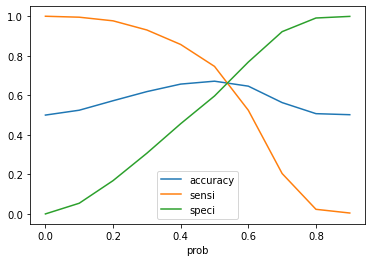

In [1554]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [1555]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    0.0    0.407768          0    1    1    1    1    1    0    0    0    0   
1    0.0    0.328863          0    1    1    1    1    0    0    0    0    0   
2    0.0    0.586102          1    1    1    1    1    1    1    0    0    0   
3    0.0    0.534792          1    1    1    1    1    1    1    0    0    0   
4    0.0    0.264941          0    1    1    1    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                0  
2    0                1  
3    0                1  
4    0                0

In [1556]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.6659871006004893

In [1557]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[ 7090,  6399],
       [ 2612, 10877]], dtype=int64)

In [1558]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.8063607383794202

In [1460]:
#Prediction on Test Set

In [1559]:
X_test_1 = X_test[col]

In [1560]:
X_test_sm = sm.add_constant(X_test_1)

In [1561]:
y_test_pred = res.predict(X_test_sm)

In [1562]:
y_test_pred = y_test_pred.values.reshape(-1)

In [1470]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()


Churn  Churn_Prob
0    0.0    0.477225
1    0.0    0.292320
2    0.0    0.394879
3    0.0    0.101371
4    0.0    0.216158

In [1563]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

In [1564]:
y_test_pred_final.head()

Churn  Churn_Prob  final_predicted
0    0.0    0.477225                1
1    0.0    0.292320                0
2    0.0    0.394879                0
3    0.0    0.101371                0
4    0.0    0.216158                0

In [1565]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.5595937152832884

In [1566]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted )
confusion2

array([[3124, 2659],
       [ 116,  402]], dtype=int64)

In [1475]:
recall_score(y_test_pred_final.Churn,y_test_pred_final.final_predicted)

0.7760617760617761

In [1567]:
print('Classification Report on Train set')
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))
print('Classification Report on Test set')
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.final_predicted))

Classification Report on Train set
              precision    recall  f1-score   support

         0.0       0.73      0.53      0.61     13489
         1.0       0.63      0.81      0.71     13489

    accuracy                           0.67     26978
   macro avg       0.68      0.67      0.66     26978
weighted avg       0.68      0.67      0.66     26978

Classification Report on Test set
              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69      5783
         1.0       0.13      0.78      0.22       518

    accuracy                           0.56      6301
   macro avg       0.55      0.66      0.46      6301
weighted avg       0.90      0.56      0.65      6301



In [1568]:
## Model 1 - Decision Tree

In [1569]:
dt_base = DecisionTreeClassifier(random_state=42)

In [1570]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1571]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [1572]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[13489,     0],
       [    0, 13489]], dtype=int64)

In [1573]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

1.0

In [1574]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[4928,  855],
       [ 351,  167]], dtype=int64)

In [1575]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3223938223938224

In [1576]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13489
         1.0       1.00      1.00      1.00     13489

    accuracy                           1.00     26978
   macro avg       1.00      1.00      1.00     26978
weighted avg       1.00      1.00      1.00     26978



In [1577]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89      5783
         1.0       0.16      0.32      0.22       518

    accuracy                           0.81      6301
   macro avg       0.55      0.59      0.55      6301
weighted avg       0.87      0.81      0.84      6301



In [1578]:
#Hyper Parameter Tuning for decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [1579]:
#Params to be tuned
params = {
    "max_depth": [2,3,5,10,20,30,40,50],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [1587]:
# Performing 5 fold CV using RECALL as scoring parameter
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [1588]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [1589]:
grid_search.best_score_

0.8503250598570247

In [1590]:
# Assigning tuned hyper parameter model to dt_best
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [1591]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [1592]:
print('Decision Tree With Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     13489
         1.0       0.86      0.89      0.87     13489

    accuracy                           0.87     26978
   macro avg       0.87      0.87      0.87     26978
weighted avg       0.87      0.87      0.87     26978



In [1593]:
print('Decision Tree With Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88      5783
         1.0       0.17      0.40      0.24       518

    accuracy                           0.79      6301
   macro avg       0.55      0.61      0.56      6301
weighted avg       0.88      0.79      0.82      6301



In [815]:
#--- 2 Model created - dt_base and dt_best for Decision Tree

In [816]:
## Model 2 - Random Forest

In [1596]:
rf_base = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [1597]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [1598]:
y_train_pred = rf_base.predict(X_train)
y_test_pred = rf_base.predict(X_test)

In [1599]:
print('Random Forest with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))


Random Forest with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13489
         1.0       1.00      1.00      1.00     13489

    accuracy                           1.00     26978
   macro avg       1.00      1.00      1.00     26978
weighted avg       1.00      1.00      1.00     26978



In [1600]:
print('Random Forest with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      5783
         1.0       0.27      0.20      0.23       518

    accuracy                           0.89      6301
   macro avg       0.60      0.58      0.59      6301
weighted avg       0.88      0.89      0.88      6301



In [1603]:
#Hyper Parameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1604]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [1613]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           verbose=1, scoring="accuracy")

In [1614]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [1608]:
grid_search.best_score_

0.9168249431801472

In [1609]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [1618]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [1619]:
print('Random Forest with  Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Random Forest with  Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     13489
         1.0       0.98      0.97      0.97     13489

    accuracy                           0.97     26978
   macro avg       0.97      0.97      0.97     26978
weighted avg       0.97      0.97      0.97     26978



In [1620]:
print('Random Forest with  Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with  Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5783
         1.0       0.27      0.27      0.27       518

    accuracy                           0.88      6301
   macro avg       0.60      0.60      0.60      6301
weighted avg       0.88      0.88      0.88      6301



In [1621]:
#MODEL 3 - XG Boost

In [1622]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [1623]:
xgb_cfl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1624]:
y_train_pred = xgb_cfl.predict(X_train)
y_test_pred = xgb_cfl.predict(X_test)

In [1625]:

print('XGBoost with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

XGBoost with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     13489
         1.0       0.99      0.97      0.98     13489

    accuracy                           0.98     26978
   macro avg       0.98      0.98      0.98     26978
weighted avg       0.98      0.98      0.98     26978



In [1626]:
print('XGBoost with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

XGBoost with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      5783
         1.0       0.30      0.18      0.23       518

    accuracy                           0.90      6301
   macro avg       0.62      0.57      0.59      6301
weighted avg       0.88      0.90      0.89      6301



In [80]:
### XGBOost Hyper Parameter Tuning

#Hyper Parameter Tuning - Using Random Search## 

In [1627]:
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [ ]:
#random_search.fit(X_train, y_train) - Ran for 5 hours before system shutdown. 

In [1630]:
#### PCA####

In [1631]:
df_PCA

night_pck_user_6  night_pck_user_7  monthly_2g_6  monthly_2g_7  \
0                   0.0               0.0           0.0           0.0   
1                   0.0               0.0           1.0           1.0   
2                   0.0               0.0           1.0           0.0   
3                   0.0               0.0           0.0           0.0   
4                   0.0               0.0           1.0           0.0   
...                 ...               ...           ...           ...   
20995               0.0               0.0           0.0           0.0   
20996               1.0               0.0           0.0           0.0   
20997               0.0               0.0           1.0           0.0   
20998               0.0               0.0           0.0           0.0   
20999               0.0               0.0           0.0           0.0   

       sachet_2g_6  sachet_2g_7  monthly_3g_6  monthly_3g_7  sachet_3g_6  \
0              7.0          6.0           0.0           0.0          0.0   
1              0.0          0.0           0.0           0.0          0.0   
2              0.0          0.0           0.0           0.0          0.0   
3              0.0          0.0           0.0           0.0          0.0   
4              3.0          1.0           0.0           0.0          0.0   
...            ...          ...           ...           ...          ...   
20995          1.0          0.0           1.0           0.0          1.0   
20996          1.0          0.0           0.0           0.0          1.0   
20997          8.0          2.0           0.0           0.0          0.0   
20998          0.0          6.0           0.0           0.0          0.0   
20999          0.0          0.0           1.0           1.0          0.0   

       sachet_3g_7  fb_user_6  fb_user_7     aon  churn_probability  \
0              1.0        1.0        1.0   616.0                0.0   
1              0.0        1.0        1.0   553.0                0.0   
2              0.0        1.0        0.0   571.0                0.0   
3              0.0        0.0        0.0   424.0                0.0   
4              1.0        1.0        1.0   542.0                0.0   
...            ...        ...        ...     ...                ...   
20995          0.0        1.0        0.0   252.0                0.0   
20996          3.0        1.0        1.0   220.0                0.0   
20997          0.0        1.0        1.0  1476.0                0.0   
20998          1.0        0.0        1.0   190.0                0.0   
20999          0.0        1.0        1.0   246.0                0.0   

       arpu_average  onnet_mou_average  offnet_mou_average  \
0          184.4495             13.055              47.550   
1          167.8650              0.000               0.000   
2          478.9215             17.710             329.450   
3         1018.2270            616.120             371.785   
4          370.7370             10.030             145.945   
...             ...                ...                 ...   
20995     1357.7555            109.175             734.875   
20996      247.6700              0.525              38.450   
20997      215.5785             69.695             174.060   
20998      213.3420              3.680             244.230   
20999      241.9945             10.825              23.510   

       roam_ic_mou_average  roam_og_mou_average  loc_og_t2t_mou_average  \
0                    26.82                7.865                   7.495   
1                     0.00                0.000                   0.000   
2                     0.00                0.000                  17.710   
3                     0.00                0.000                 616.120   
4                     0.00                0.000                  10.030   
...                    ...                  ...                     ...   
20995                 0.00                0.000                 109.175   
20996              

In [1632]:
Cat_Cols

['night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7',
 'churn_probability']

In [1633]:
all_columns=df_PCA.columns

In [1634]:
len(all_columns)

56

In [1637]:
num_cols = [i for i in all_columns if i not in Cat_Cols]

In [1638]:
len(num_cols)

51

In [1641]:
df_PCA[num_cols].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.197524      0.209000      1.054952      1.207952      0.224810   
std        0.451815      0.468225      2.494153      2.758989      0.608043   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        4.000000      5.000000     42.000000     48.000000      9.000000   

       monthly_3g_7   sachet_3g_6   sachet_3g_7           aon  arpu_average  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.232000      0.214429      0.233952   1185.625000    546.153607   
std        0.654585      0.997865      1.104381    959.407619    453.567599   
min        0.000000      0.000000      0.000000    149.000000   -451.713500   
25%        0.000000      0.000000      0.000000    429.000000    304.838250   
50%        0.000000      0.000000      0.000000    826.000000    483.337250   
75%        0.000000      0.000000      0.000000   1760.000000    673.550875   
max       16.000000     29.000000     33.000000   4290.000000  31438.461000   

       onnet_mou_average  offnet_mou_average  roam_ic_mou_average  \
count       21000.000000        21000.000000         21000.000000   
mean          254.249627          361.935035            14.338586   
std           444.292867          456.372087            67.182971   
min             0.000000            0.000000             0.000000   
25%            16.468750           68.853750             0.000000   
50%            79.745000          211.542500             0.000000   
75%           279.440000          481.776250             1.670500   
max          7331.060000         7124.750000          3060.600000   

       roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         21000.000000            21000.000000            21000.000000   
mean             23.358456               82.675809              157.095066   
std              94.646522              223.088195              227.710227   
min               0.000000                0.000000                0.000000   
25%               0.000000                5.910000               22.792500   
50%               0.000000               24.685000               76.972500   
75%               3.047500               75.641250              199.481250   
max            2410.835000             5941.565000             4150.165000   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            21000.000000            21000.000000        21000.000000   
mean                 6.197118                1.708795          245.976252   
std                 19.036747                6.638899          357.589198   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           37.071250   
50%                  0.680000                0.000000          121.685000   
75%                  4.625000                1.136250          316.661250   
max                708.070000              420.575000         6582.420000   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            21000.000000            21000.000000            21000.000000   
mean               162.311514              175.982599                1.669326   
std                387.743683              389.739520               10.912804   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.776000               16.375500                0.000000 

In [1642]:
#Capping Outliers for PCA DF
df_PCA[num_cols] = df_PCA[num_cols].apply(cap_outliers, axis=0)

In [1643]:
df_PCA[num_cols].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.187294      0.198308      0.965072      1.118923      0.204520   
std        0.411033      0.426618      2.060892      2.318260      0.495992   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        1.552969      1.613674      8.537412      9.484921      2.048939   

       monthly_3g_7   sachet_3g_6   sachet_3g_7           aon  arpu_average  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean       0.209726      0.166564      0.179674   1185.539987    537.213277   
std        0.516996      0.545488      0.600848    959.146570    332.633334   
min        0.000000      0.000000      0.000000    149.000000   -451.713500   
25%        0.000000      0.000000      0.000000    429.000000    304.838250   
50%        0.000000      0.000000      0.000000    826.000000    483.337250   
75%        0.000000      0.000000      0.000000   1760.000000    673.550875   
max        2.195756      3.208023      3.547096   4063.847857   1906.856404   

       onnet_mou_average  offnet_mou_average  roam_ic_mou_average  \
count       21000.000000        21000.000000         21000.000000   
mean          239.341620          348.754849            11.281901   
std           363.804981          389.900749            35.426961   
min             0.000000            0.000000             0.000000   
25%            16.468750           68.853750             0.000000   
50%            79.745000          211.542500             0.000000   
75%           279.440000          481.776250             1.670500   
max          1587.128227         1731.051297           215.887498   

       roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         21000.000000            21000.000000            21000.000000   
mean             18.464853               71.834239              149.724926   
std              54.533239              129.042824              188.077338   
min               0.000000                0.000000                0.000000   
25%               0.000000                5.910000               22.792500   
50%               0.000000               24.685000               76.972500   
75%               3.047500               75.641250              199.481250   
max             307.298021              751.940394              840.225747   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            21000.000000            21000.000000        21000.000000   
mean                 5.361014                1.492905          233.875805   
std                 11.542772                3.541526          288.595975   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           37.071250   
50%                  0.680000                0.000000          121.685000   
75%                  4.625000                1.136250          316.661250   
max                 63.307358               21.625491         1318.743845   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            21000.000000            21000.000000            21000.000000   
mean               147.981757              160.733870                1.195440   
std                307.875940              307.097600                4.607084   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.776000               16.375500                0.000000 

In [1993]:
# Putting feature variable to X
X = df_PCA.drop('churn_probability',axis=1)


In [1994]:
# Putting response variable to y
y = df_PCA['churn_probability']

In [1995]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y, random_state=42)
X_train.shape, X_test.shape

((14699, 55), (6301, 55))

In [1996]:
y_train.value_counts()

0.0    13489
1.0     1210
Name: churn_probability, dtype: int64

In [1997]:
## Data imbalance is seen.
#There are 10663 data points that belong to class 0 and only 624 belong to class 1

In [1998]:
### Correcting imbalance using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [1999]:
y_train_PCA.value_counts()

0.0    13489
1.0    13489
Name: churn_probability, dtype: int64

In [2004]:
# Using Standard scalar
scaler = StandardScaler()
# Transforming and Fitting data on Train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#S Transforming without fitting on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [2005]:
from sklearn.decomposition import PCA

In [2006]:
pca = PCA(random_state=42)

In [2007]:
pca.fit(X_train)

PCA(random_state=42)

In [2008]:
pca.components_

array([[-3.24962187e-03, -2.65553615e-03, -7.89264155e-02, ...,
        -1.29607523e-01, -1.78598256e-01, -1.48231786e-01],
       [-5.26696333e-04, -3.05031040e-04,  7.69150331e-02, ...,
        -1.52570469e-02,  1.84677368e-01,  1.64489364e-01],
       [ 1.94056219e-03,  1.06573942e-03,  2.02645344e-02, ...,
         1.24373251e-01, -1.64577808e-01, -1.15605411e-01],
       ...,
       [-5.68184452e-01,  8.19723247e-01,  2.50112904e-03, ...,
        -2.24901011e-03, -5.99821008e-03,  8.66588048e-04],
       [ 6.09697047e-02,  2.57460833e-02, -6.91121393e-02, ...,
        -3.83735979e-03,  3.38889715e-03, -2.41644305e-03],
       [-5.36414881e-03,  1.43178370e-02, -2.12224033e-03, ...,
        -2.00550033e-05,  1.02702427e-03, -1.33470221e-03]])

In [1817]:
#Looking at the explained variance ratio for each component

In [2009]:
pca.explained_variance_ratio_

array([1.56296823e-01, 1.22924398e-01, 8.36561726e-02, 6.66502297e-02,
       4.82424112e-02, 4.20119226e-02, 3.71542469e-02, 3.60487855e-02,
       3.15318977e-02, 3.02063689e-02, 2.75704402e-02, 2.70753947e-02,
       2.04534868e-02, 2.01214249e-02, 1.95819285e-02, 1.85305966e-02,
       1.72310995e-02, 1.61866120e-02, 1.52163657e-02, 1.41474442e-02,
       1.38559935e-02, 1.20434613e-02, 1.15062201e-02, 1.11033832e-02,
       1.03839960e-02, 9.76255844e-03, 9.48323571e-03, 8.76395450e-03,
       8.27137564e-03, 7.95586254e-03, 7.09357767e-03, 5.86190625e-03,
       5.70983745e-03, 5.46946869e-03, 4.16374644e-03, 3.68006985e-03,
       3.29716881e-03, 2.82600158e-03, 1.63606425e-03, 8.39686997e-04,
       7.82617200e-04, 7.42075223e-04, 6.55290552e-04, 5.01583828e-04,
       4.45528713e-04, 4.10766528e-04, 3.61574224e-04, 3.41472125e-04,
       3.12317906e-04, 2.37886786e-04, 1.95500658e-04, 1.71333768e-04,
       1.17727647e-04, 9.90767358e-05, 7.96302496e-05])

In [2010]:
#Making a scree plot for the explained variance

In [2011]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

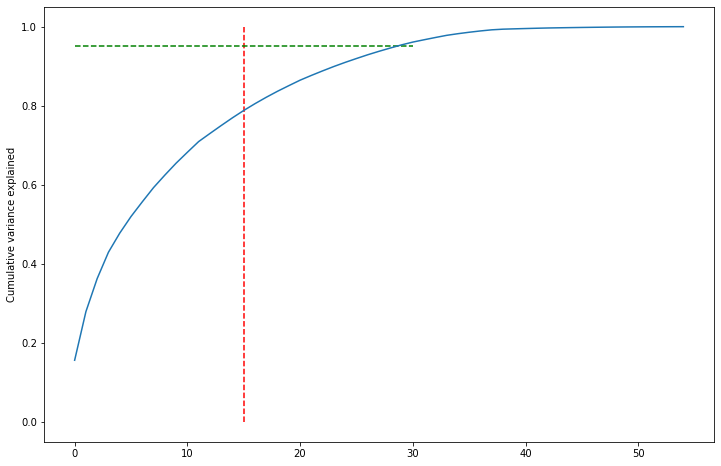

In [1914]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [2012]:
from sklearn.decomposition import IncrementalPCA

In [2013]:
pca_final = IncrementalPCA(n_components=15)

In [2014]:
df_train_pca = pca_final.fit_transform(X_train)

In [2015]:
df_train_pca.shape

(26978, 15)

In [2016]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [2017]:
#Plotting the heatmap of the corr matrix

<AxesSubplot:>

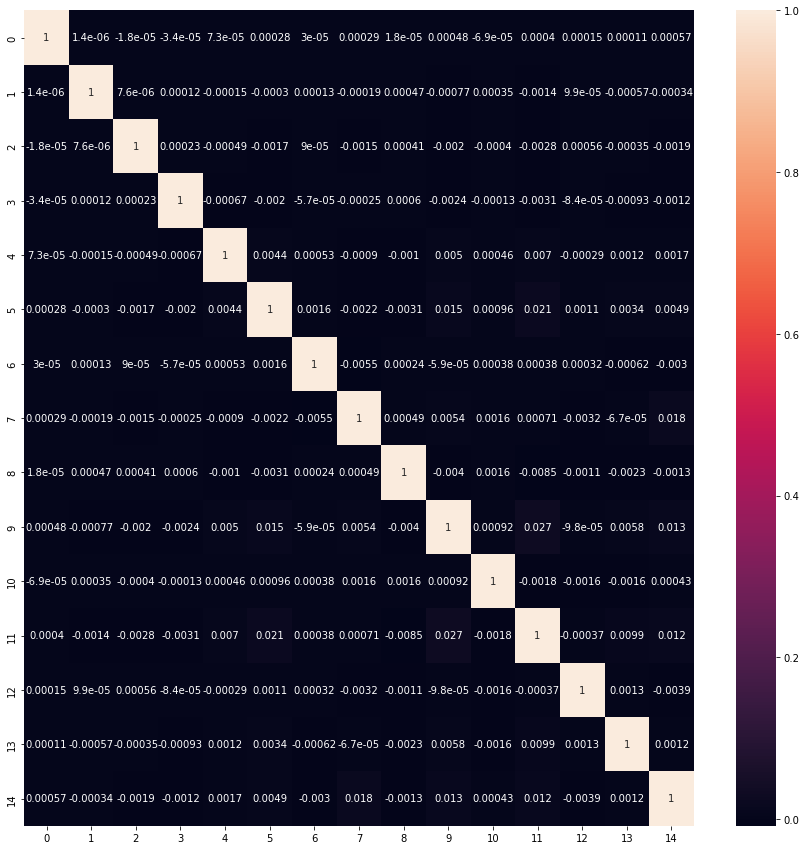

In [2018]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [2019]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6301, 15)

array([[-3.96837878, -3.2503921 ,  3.88820893, ...,  0.08138699,
        -0.13055618,  0.25353877],
       [-2.34717528,  0.73049848, -0.35560799, ..., -0.05585123,
        -0.06461005,  0.97797064],
       [ 2.09738422,  1.8339517 ,  1.51894196, ...,  0.58231922,
        -0.09281424, -1.1431064 ],
       ...,
       [-2.40688584,  2.57579569, -1.63271354, ..., -0.52379955,
         0.20837182,  0.63412048],
       [ 2.62437488,  1.42555685,  1.85399878, ...,  3.81435461,
        -0.19115361, -0.32894711],
       [-4.71875312,  5.42670341, -5.50714419, ..., -0.3873241 ,
        -0.498051  ,  0.14462624]])

In [2022]:
X_test=df_test_pca
X_train=df_train_pca

In [2023]:
LR = LogisticRegression()
model_pca_LR = LR.fit(X_train, y_train)



In [2024]:
y_train_pred = model_pca_LR.predict_proba(X_train)

In [2025]:
y_train_pred=pd.DataFrame(y_train_pred)

In [2026]:
y_train_pred_final = pd.concat([y_train_pred, y_train], axis=1)

In [2027]:
y_train_pred_final

0         1  churn_probability
0      0.526586  0.473414                0.0
1      0.619904  0.380096                0.0
2      0.513273  0.486727                0.0
3      0.596663  0.403337                0.0
4      0.608862  0.391138                0.0
...         ...       ...                ...
26973  0.367698  0.632302                1.0
26974  0.315386  0.684614                1.0
26975  0.491224  0.508776                1.0
26976  0.307357  0.692643                1.0
26977  0.179108  0.820892                1.0

[26978 rows x 3 columns]

In [2028]:
y_train_pred_final = y_train_pred_final.rename(columns={0: 'Zero', 1: 'Churn_Prob'})

In [2029]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [2030]:
print(classification_report(y_train_pred_final.churn_probability, y_train_pred_final.predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.61      0.64     13489
         1.0       0.65      0.72      0.68     13489

    accuracy                           0.66     26978
   macro avg       0.67      0.66      0.66     26978
weighted avg       0.67      0.66      0.66     26978



In [2031]:
#Fine Tuning


In [2032]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn_probability, y_train_pred_final.Churn_Prob, drop_intermediate = False )

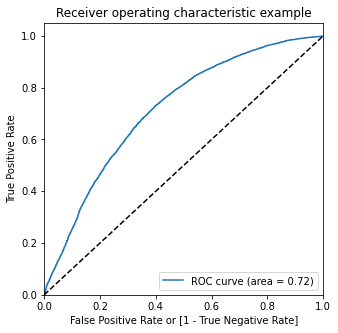

In [2033]:
draw_roc(y_train_pred_final.churn_probability, y_train_pred_final.Churn_Prob)

In [2034]:
numbers = [float(j)/10 for j in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Zero  Churn_Prob  churn_probability  predicted  0.0  0.1  0.2  0.3  \
0  0.526586    0.473414                0.0          0    1    1    1    1   
1  0.619904    0.380096                0.0          0    1    1    1    1   
2  0.513273    0.486727                0.0          0    1    1    1    1   
3  0.596663    0.403337                0.0          0    1    1    1    1   
4  0.608862    0.391138                0.0          0    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    0    0    0    0    0  
3    1    0    0    0    0    0  
4    0    0    0    0    0    0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.518534  0.995181  0.041886
0.2   0.2  0.559233  0.979094  0.139373
0.3   0.3  0.605493  0.934465  0.276522
0.4   0.4  0.646712  0.860108  0.433316
0.5   0.5  0.664653  0.722515  0.606791
0.6   0.6  0.640188  0.499147  0.781229
0.7   0.7  0.554155  0.178812  0.929498
0.8   0.8  0.511824  0.032026  0.991623
0.9   0.9  0.500556  0.002965  0.998147


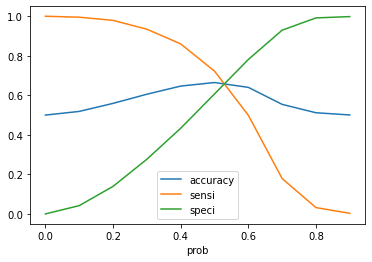

In [2035]:

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [2036]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

In [2037]:
metrics.accuracy_score(y_train_pred_final.churn_probability, y_train_pred_final.final_predicted)

0.6587589888056935

In [2038]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_pred_final.churn_probability,y_train_pred_final.final_predicted)

0.798947290384758

In [1568]:
## PCA - Decision Tree

In [2043]:
dt_base = DecisionTreeClassifier(random_state=42)

In [2044]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [2045]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [2046]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[13489,     0],
       [    0, 13489]], dtype=int64)

In [2047]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

1.0

In [2048]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[4459, 1324],
       [ 355,  163]], dtype=int64)

In [2049]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.31467181467181465

In [2050]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13489
         1.0       1.00      1.00      1.00     13489

    accuracy                           1.00     26978
   macro avg       1.00      1.00      1.00     26978
weighted avg       1.00      1.00      1.00     26978



In [2051]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84      5783
         1.0       0.11      0.31      0.16       518

    accuracy                           0.73      6301
   macro avg       0.52      0.54      0.50      6301
weighted avg       0.86      0.73      0.79      6301



In [2052]:
#Hyper Parameter Tuning for decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [2053]:
#Params to be tuned
params = {
    "max_depth": [2,3,5,10,20,30,40,50],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [2054]:
# Performing 5 fold CV using RECALL as scoring parameter
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [2055]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [2056]:
grid_search.best_score_

0.8179253614303347

In [2057]:
# Assigning tuned hyper parameter model to dt_best
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [2058]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [2059]:
print('Decision Tree With Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.72      0.46      0.57     13489
         1.0       0.61      0.82      0.70     13489

    accuracy                           0.64     26978
   macro avg       0.66      0.64      0.63     26978
weighted avg       0.66      0.64      0.63     26978



In [2060]:
print('Decision Tree With Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63      5783
         1.0       0.11      0.75      0.19       518

    accuracy                           0.49      6301
   macro avg       0.53      0.61      0.41      6301
weighted avg       0.88      0.49      0.59      6301



In [816]:
## Model 7 - Random Forest - PCA

In [2063]:
rf_base = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [2064]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [2065]:
y_train_pred = rf_base.predict(X_train)
y_test_pred = rf_base.predict(X_test)

In [2066]:
print('Random Forest with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))


Random Forest with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13489
         1.0       1.00      1.00      1.00     13489

    accuracy                           1.00     26978
   macro avg       1.00      1.00      1.00     26978
weighted avg       1.00      1.00      1.00     26978



In [2067]:
print('Random Forest with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      5783
         1.0       0.17      0.25      0.20       518

    accuracy                           0.84      6301
   macro avg       0.55      0.57      0.56      6301
weighted avg       0.87      0.84      0.85      6301



In [2068]:
#Hyper Parameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [2069]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [2070]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           verbose=1, scoring="accuracy")

In [2071]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [2072]:
grid_search.best_score_

0.8616651266066719

In [2073]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [2074]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [1619]:
print('Random Forest with  Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Random Forest with  Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     13489
         1.0       0.98      0.97      0.97     13489

    accuracy                           0.97     26978
   macro avg       0.97      0.97      0.97     26978
weighted avg       0.97      0.97      0.97     26978



In [2075]:
print('Random Forest with  Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with  Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.89      5783
         1.0       0.16      0.33      0.21       518

    accuracy                           0.80      6301
   macro avg       0.55      0.59      0.55      6301
weighted avg       0.87      0.80      0.83      6301



In [ ]:
#### For Solution file####